# Исследование игровой индустрии для интернет-магазина "Стримчик"

# Краткое описание проекта

2016 год. Интернет-магазин «Стримчик», продающий компьютерные игры в различных регионах, располагает историческими данными из открытых источников. В доступе имеются данные о продажах игр, оценках пользователей и критиков, жанрах и платформах (Xbox, PlayStation и т.д.).  В качестве задания необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

# План работы

1. Импортирование необходимых для работы библиотек;


2. Загрузка данных и знакомство с ними;


3. Ознакомление с типами данных и их изменение при необходимости;


4. Поиск и обработка дубликатов и пропущенных значений;


5. Добавление необходимых столбцов;


6. Проведение исследовательского анализа данных - установка и изучение актуальных платформ и жанров; 


7. составление портрета среднего игрока из изучаемых регионов; 


8. Проведение статистического анализа - проверка гипотез;


9. Подготовка итогового вывода.

### Импортирование библиотек

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Загрузка данных

Загрузим данные, создадим датафрейм

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Портфолио\\games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим информацию о наборе данных

In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# приведем названия столбцов к единому регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит добавить вывод по результатам выполнения раздела проекта

Для работы с данными на текущем этапе были импортированы необходимые библиотеки и загружен датасет. Впоследствии была изучена информация о датасете, а названия колонок приведены к единому формату для удобства работы с ними

### Преобразование данных

Перед тем как изменять типы данных необходимо изучить исходные типы и проверить наличие пропусков, поскольку их присутствие может стать проблемой для изменения типа данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Столбец  'year_of_release'

Есть смысл перевести столбец 'year_of_release' в int, поскольку год - сам по себе целочисленное значение, не уверен, что будет уместно использовать to_datetime, поскольку полной даты все равно нет. Однако изменению типа данных может помешать наличие пропусков.

In [7]:
data['year_of_release'].isna().sum()

269

In [8]:
year_na = data.loc[data['year_of_release'].isna()]
year_na['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Пропуски в "year_of_release" могут быть как с технической ошибкой, так и с ошибками при заполнении - в некоторых названиях игр указан год, по типу "Madden NFL 2004", "wwe Smackdown vs. Raw 2006", "Tiger Woods PGA Tour 07", 'College Hoops 2K6'. Также встречаются игры с указанием года выпуска в скобках 'Tomb Raider (2013)'. Их количество не слишком велико по сравнению с общим размером датасета, но достаточно велико, чтобы добавлять год их выпуска вручную было проблематично. Количество пропусков, вероятно, не слишком отразится на результатах исследования, поэтому их, вероятно, можно удалить для изменения типа данных. 

P.S. 
Мне не слишком понятно, как работает замена типа данных с использованием аргумента errors=ignore - насколько я понял, при его применении тип данных должен изменяться в тех ячейках, где есть числовые значения, но не затрагивать пропуски. Однако, кажется, это так не работает 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
        P.S. Мне не слишком понятно, как работает замена типа данных с использованием аргумента errors=ignore - насколько я понял, при его применении тип данных должен изменяться в тех ячейках, где есть числовые значения, но не затрагивать пропуски. Однако, кажется, это так не работает
        
Это не позволит изменить тип данных на «чистый» int, кажется получиться изменить только на int64, но на старых версиях библиотеки pandas с ним могут быть разные проблемы, поэтому в тренажере не стоит экспериментировать с этим типом данных

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Спасибо, понял

In [9]:
# Избавимся от пропусков
data = data.dropna(subset=['year_of_release'])

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Решение верное, перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли ...
        
На этом проекте мы работаем с продажами, поэтому включается другой фактор, кроме процента потерь ...        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Да, я тоже подумал о "весе" проектов.  
        
        

In [10]:
# Изменим тип данных на 'int'
data['year_of_release'] = data['year_of_release'].astype(int)

In [11]:
# Проверим 
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int32

#### Столбец  'critic_score'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [13]:
# Проверим значения в столбце 'critic_score'
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [14]:
data['critic_score'].isna().sum()

8463

Значения столбца 'critic_score' также стоило бы перевести в int, поскольку его значения - это целые числа, однако в этом столбце содержится большое количество пропусков и заполнить их чем-то не представляется возможным, поскольку это сильно исказит картину. Вероятно, придется оставить пропуски на месте. Прямой необходимости в изменении типа данных, в целом, нет, так что, на мой взгляд, это не критично

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

#### Столбец  'user_score'

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Стоит изменить тип данных с object на float, поскольку там содержатся вещественные числа и это понадобится в расчетах

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' также обнажилось значение tbd, можно предположить, что tbd означает to be decided/determined, то есть не определено, вероятно, к ним так же стоит относиться как к пропускам

In [17]:
# подсчитаем количество 'tbd'
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2376

In [18]:
# заменим tbd на NaN и попытаемся изменить тип данных на float
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

In [19]:
#Проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [20]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Обработка дубликатов и пропусков 

#### Поиск дубликатов

In [21]:
# Имеет смысл искать совпадения не по всем столбцам, но по наиболее очевидным
data[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [22]:
data.loc[data[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [23]:
# Удалим явные дубликаты
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])
data[['name', 'platform', 'year_of_release']].duplicated().sum()

0

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Верно обработаны дубликаты, молодец

#### Поиск пропусков

Часть из пропусков была обнаружена и прокомментирована на предыдущем шаге, однако возможные причины пропусков будут изложены здесь

In [24]:
# Изучим датасет на предмет наличия пропусков
data.isna().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
dtype: int64

In [25]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


В столбце 'name' всего один пропуск, он также совпадает с пропуском в столбце 'genre' продажи не кажутся значительными, так что вероятно, есть смысл удалить эту строку

In [26]:
data = data.dropna(subset=['name'])

In [27]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Не думаю, что пропуски в столбце 'rating' можно чем-то адекватно заменить, у нас нет данных от ассоциации ESRB. Придется оставить пропуски.

#### Предположения о возникновении пропусков 


1) Единственный пропуск в столбце "name", вероятно, связан с технической ошибкой, поскольку помимо названия, там отсутствовали и другие данные, в том числе и в столбце "genre", где также был только один пропуск;

2) Как отмечалось ранее для возникновения пропусков в "year_of_release" могли быть различные причины - как технические, так и связяанные с ошибками при заполнении - об этом говорит то, что некоторых названиях игр указан год, по типу "Madden NFL 2004", "wwe Smackdown vs. Raw 2006", "Tiger Woods PGA Tour 07", 'College Hoops 2K6'. Также встречаются игры с указанием года выпуска в скобках 'Tomb Raider (2013)'. Их количество оказалось не слишком велико по сравнению с общим размером датасета, поэтому было принято решение удалить пропуски.

3) Пропуски "critic_score" могут быть связаны с тем, что игры не вышли на американском или европейском рынке. Насколько мне известно в Японии распространена практика выпуска игр только для внутреннего рынка, следовательно эти игры могут быть малоизвестны и не получить оценки критиков за пределами страны. Также cуществует вероятность того, что игры могли выходить слишком давно для того, чтобы о них писали критические отзывы на площадках, откуда собирались данные для датасета что это представляется маловероятным. Возможны и ошибки технического характера, например, ошибки при выгрузке

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера  </b></font>
    <br /> 
    <font size="3", color = "black">
<br />плюс   отсутствие ресурсов на сбор информации (время, деньги)

In [28]:
# Проверим предположение об отсутствии продаж в регионах 
data.loc[(data['critic_score'].isna()) & (data['eu_sales'] == 0.0) | (data['na_sales'] == 0.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.00,3.77,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.00,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN
388,Final Fantasy III,SNES,1994,Role-Playing,0.86,0.00,2.55,0.02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Почти половина игр без рейтинга не выходило в Северной Америке и Европе, однако среди игр без оценки критиков есть и новые игры

5) Причины для пропусков в "user_score" так же могут быть связаны с регионами продаж, популярностью игр, годом выпуска или техническими ошибками.

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

In [29]:
# Проверим предположение об отсутствии продаж в регионах 
data.loc[(data['user_score'].isna()) & (data['eu_sales'] == 0.0) | (data['na_sales'] == 0.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.00,3.77,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.00,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN
388,Final Fantasy III,SNES,1994,Role-Playing,0.86,0.00,2.55,0.02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Ситуация практически аналогична предыдущей

6) Часть пропусков в столбце 'rating' могли возникнуть по причине того, что некоторые из игр вышли до создания Ассоциации ESRB, и рейтинг им, возможно, не присваивался. Также пропуски в ней могут быть связаны с тем, что ESRB выдает рейтинги для развлекательного ПО на территории США и Канады, следовательно, если игры не были представлены на североамериканском рынке, то рейтинг тоже может отсутствовать. Также не исключаются ошибки технического характера

In [30]:
data['rating'].isna().sum()

6676

In [31]:
data.loc[(data['rating'].isna()) & (data['year_of_release'] < 1994) | (data['na_sales'] == 0.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Поскольку это категориальное значение, возможно, имеет смысл использовать "заглушку"

In [32]:
data['rating'] = data['rating'].fillna('No data')
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No data
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No data
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No data
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No data


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отличное решение для столбца, который содержит категориальные данные, поможет определить ключевое различие в потрете пользователя
        
        ... .fillna('No data')
        
Можно посмотреть на частотность использования категорий рейтинга, по отношению к остальным
        
        EC         8
        K-A        3
        RP         1
        AO         1

### Добавление столбца с общим числом проданных копий

In [33]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [34]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Спасибо, очень полезно! 
        
        

In [35]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No data,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No data,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No data,28.31


In [36]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит добавить короткий обобщающий вывод по результатам выполнения каждого раздела проекта

На текущем этапе в датасет был добавлен столбец, содержащий данные о совокупных продажах игр во всех регионах

### Исследовательский анализ данных

#### Выпуск игр по годам

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
games_total,9,46,36,17,14,14,21,16,15,17,...,1197,1427,1426,1255,1136,652,544,581,606,502


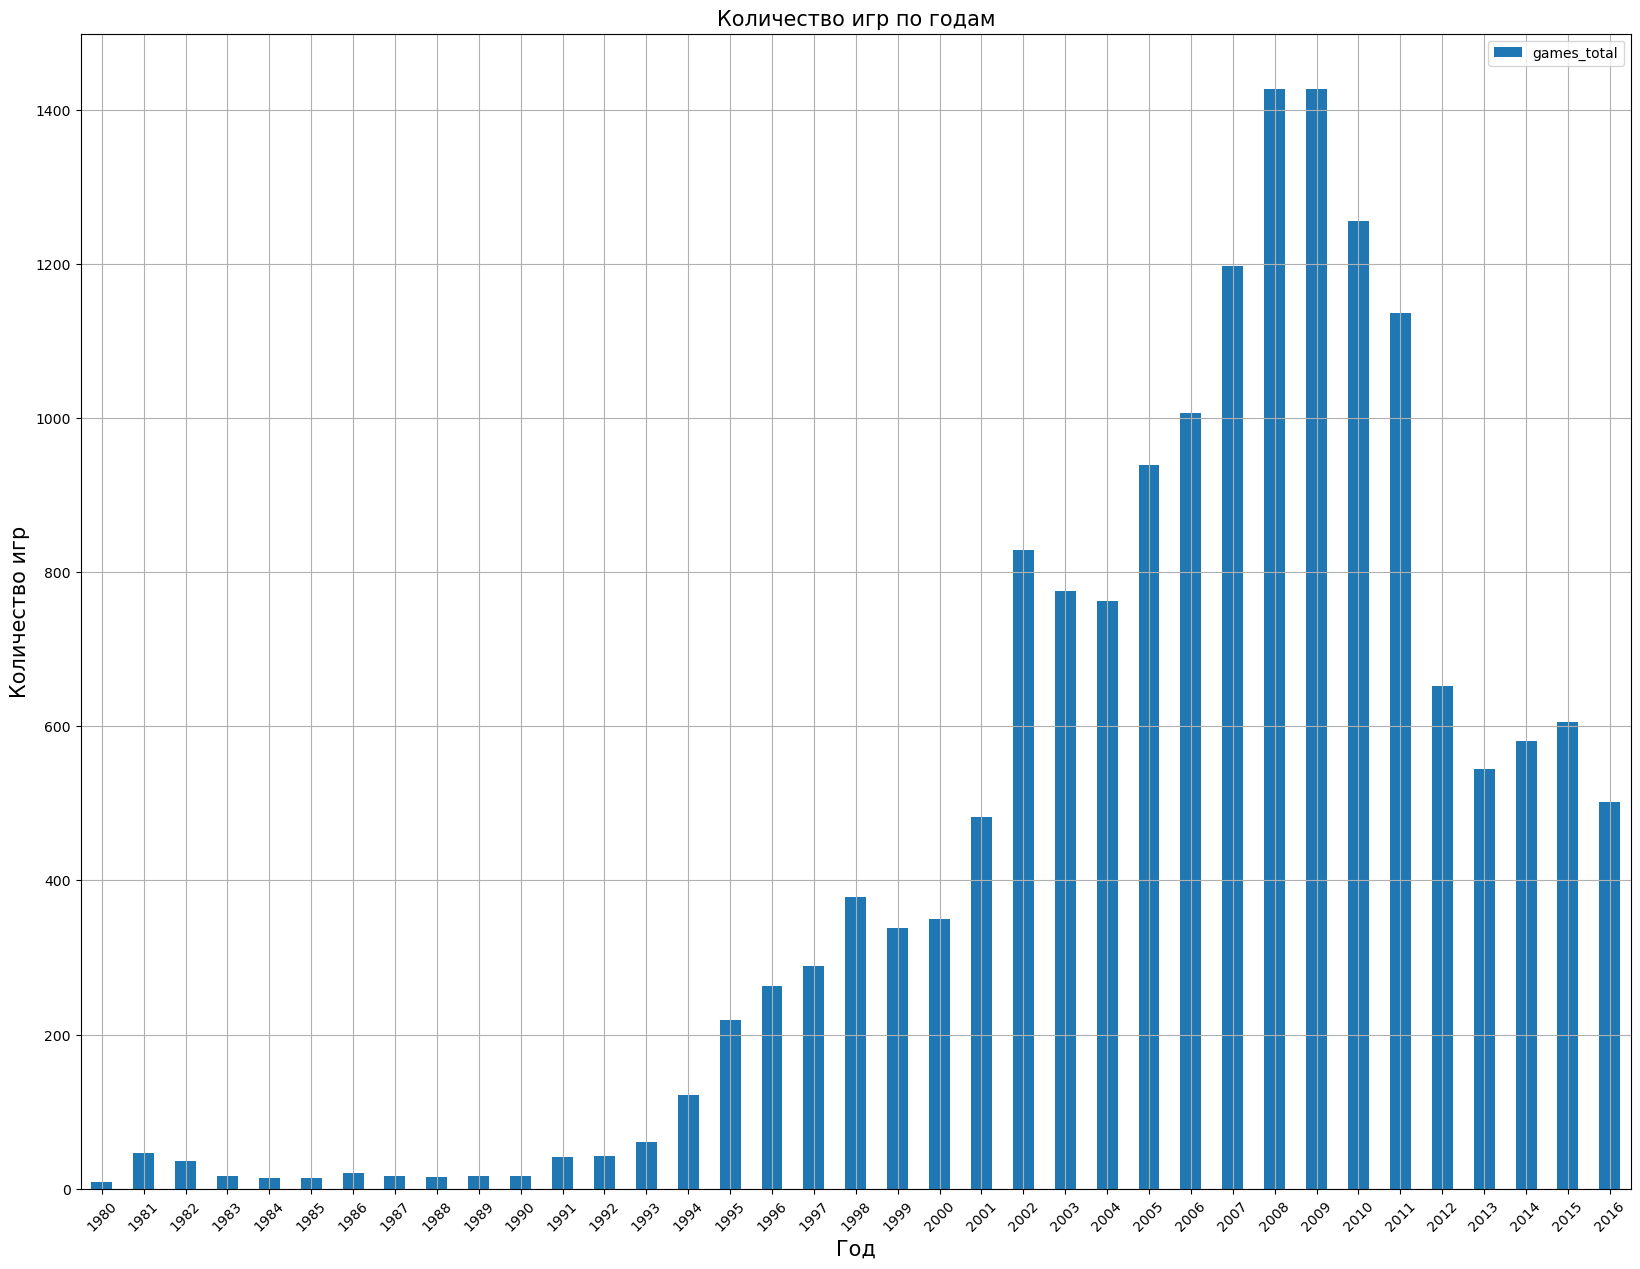

In [37]:
games_by_year = data.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')
games_by_year = games_by_year.query('year_of_release != 9999')
games_by_year.columns = ['games_total']
games_by_year.sort_values(by='year_of_release').plot(kind='bar', figsize =(20,15), grid=True)
plt.title('Количество игр по годам', fontsize=15) 
plt.xlabel('Год', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.xticks(rotation=45);
games_by_year.transpose()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит развернуть и сократить кол-во надписей на оси Х
        
        1980 - 1985 - 1990 ...

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Как их покрутить я помню с прошлого раза, но как сократить количество надписей, я не очень понял. Возможно стоит применить set_xticks()?
        
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
Можно  поискать тему Ticks and ticklabels
        
https://matplotlib.org/stable/tutorials/text/text_intro.html
        
или
        
https://dev-gang.ru/article/izmenenie-czastoty-tikov-v-matplotlib-k5x1kznn39/?ysclid=lcp5si8pky848462627

In [38]:
games_by_year

,games_total
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Можно предположить, что количество игр до 1994 года слишком мало и не слишком актуально, следует его отбросить

In [39]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No data,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No data,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No data,0.01


In [40]:
data_filetered = data.query('year_of_release >= 1994')
data_filetered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No data,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No data,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No data,0.01


Потери оказались не слишком велики

#### Анализ платформ

Изучим данные по платформам и посмотрим, как изменялась динамика их продаж

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Спасибо, иногда забываю об этом

In [41]:
# Создадим сводную таблицу, содержащую данные о платформах и их продажах по годам
platform_dynamics = data_filetered.pivot_table(index=['year_of_release', 'platform'], 
                                               values='total_sales', aggfunc='sum')
platform_dynamics.reset_index(inplace=True)
platform_dynamics

,year_of_release,platform,total_sales
0,1994,3DO,0.02
1,1994,GB,12.18
2,1994,GEN,8.13
3,1994,NES,0.11
4,1994,NG,0.80
...,...,...,...
192,2016,PSV,4.25
193,2016,Wii,0.18
194,2016,WiiU,4.60
195,2016,X360,1.52


In [42]:
# Изучим общую сумму продаж по платформам за все года
platform_total_sales = platform_dynamics.pivot_table(index='platform', 
                                                     values='total_sales', aggfunc='sum')
platform_total_sales.reset_index(inplace=True)
platform_total_sales = platform_total_sales.sort_values(by='total_sales', ascending=False)
platform_total_sales

,platform,total_sales
14,PS2,1233.56
26,X360,961.24
15,PS3,931.33
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


Самыми продаваемыми плафтормами стали PS2, X360, PS3, Wii, DS и PS. Построим для них распределение по годам  

In [43]:
# Создадим список топ-платформ по продажам
top_platforms_list = list(platform_total_sales['platform'][0:6])
top_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [44]:
# Создадим датафрейм, содержащий только данные по топу платформ
top_platforms = data_filetered.query('platform in @top_platforms_list')
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,No data,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No data,0.01


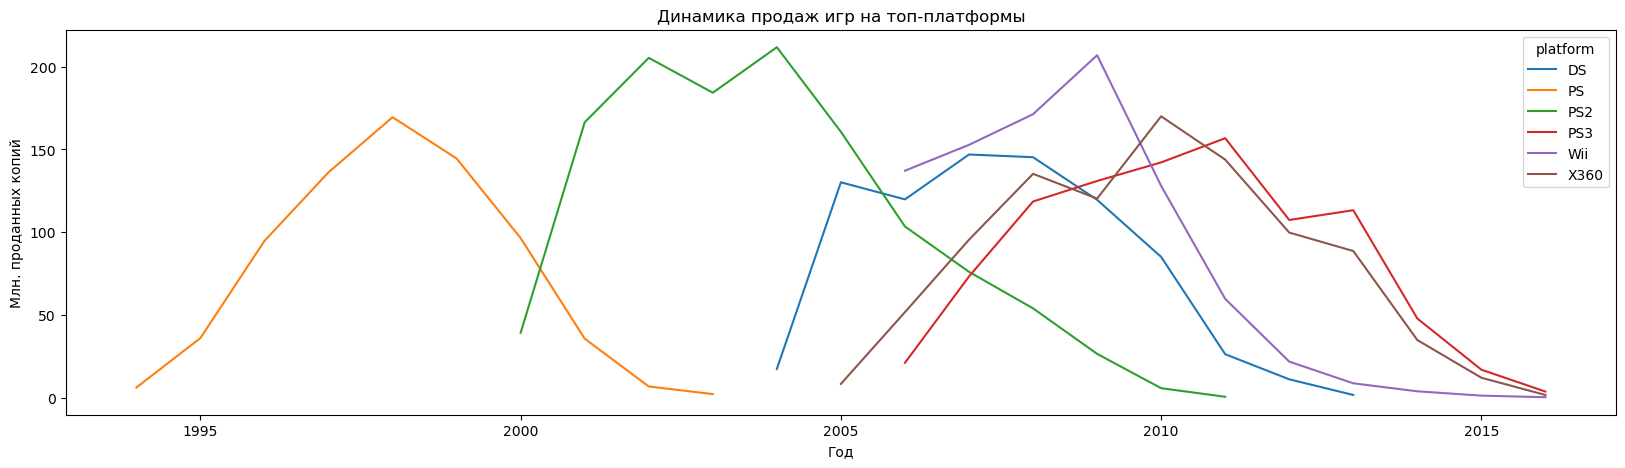

In [45]:
# построим график
top_platforms.pivot_table(index='year_of_release', columns='platform', 
                          values='total_sales', aggfunc='sum').plot(figsize=(20,5))
plt.title('Динамика продаж игр на топ-платформы')
plt.xlabel('Год')
plt.ylabel('Млн. проданных копий');

Можно сделать предположение, что платформа остается актуальной, пока продажи игр на нее за год превышают сумму в 50 млн копий в год, изучим период актуальность топ-платформ в отдельности

#### Определение актуального периода

Резонно было бы создать функцию, чтобы автоматизировать процесс, но у меня не очень это получилось. Г-н/г-жа ревьюер, можно попросить меня немного направить в эту сторону?

In [46]:
PS2_relevance_period = platform_dynamics.query('platform == "PS2" & total_sales > 50')
PS2_relevance_period.reset_index(inplace=True)
PS2_relevance_period

,index,year_of_release,platform,total_sales
0,63,2001,PS2,166.43
1,72,2002,PS2,205.38
2,78,2003,PS2,184.31
3,84,2004,PS2,211.81
4,91,2005,PS2,160.66
5,99,2006,PS2,103.42
6,110,2007,PS2,75.99
7,119,2008,PS2,53.90


In [47]:
X360_relevance_period = platform_dynamics.query('platform == "X360" & total_sales > 50')
X360_relevance_period.reset_index(inplace=True)
X360_relevance_period

,index,year_of_release,platform,total_sales
0,103,2006,X360,51.62
1,114,2007,X360,95.41
2,123,2008,X360,135.26
3,131,2009,X360,120.29
4,138,2010,X360,170.03
5,147,2011,X360,143.84
6,156,2012,X360,99.74
7,166,2013,X360,88.58


In [48]:
PS3_relevance_period = platform_dynamics.query('platform == "PS3" & total_sales > 50')
PS3_relevance_period.reset_index(inplace=True)
PS3_relevance_period

,index,year_of_release,platform,total_sales
0,111,2007,PS3,73.19
1,120,2008,PS3,118.52
2,128,2009,PS3,130.93
3,135,2010,PS3,142.17
4,143,2011,PS3,156.78
5,151,2012,PS3,107.35
6,160,2013,PS3,113.25


In [49]:
Wii_relevance_period = platform_dynamics.query('platform == "Wii" & total_sales > 50')
Wii_relevance_period.reset_index(inplace=True)
Wii_relevance_period

,index,year_of_release,platform,total_sales
0,102,2006,Wii,137.15
1,113,2007,Wii,152.77
2,122,2008,Wii,171.32
3,130,2009,Wii,206.97
4,137,2010,Wii,127.95
5,146,2011,Wii,59.65


In [50]:
DS_relevance_period = platform_dynamics.query('platform == "DS" & total_sales > 50')
DS_relevance_period.reset_index(inplace=True)
DS_relevance_period

,index,year_of_release,platform,total_sales
0,87,2005,DS,130.14
1,95,2006,DS,119.81
2,106,2007,DS,146.94
3,117,2008,DS,145.31
4,125,2009,DS,119.54
5,132,2010,DS,85.02


In [51]:
PS_relevance_period = platform_dynamics.query('platform == "PS" & total_sales > 50')
PS_relevance_period.reset_index(inplace=True)
PS_relevance_period

,index,year_of_release,platform,total_sales
0,23,1996,PS,94.70
1,29,1997,PS,136.17
2,36,1998,PS,169.49
3,43,1999,PS,144.53
4,52,2000,PS,96.37


In [52]:
# Расчитаем средний период актуальности популярных платформ 
((PS_relevance_period['year_of_release'].count() + DS_relevance_period['year_of_release'].count() 
  + Wii_relevance_period['year_of_release'].count() + PS3_relevance_period['year_of_release'].count() 
  + X360_relevance_period['year_of_release'].count() + PS2_relevance_period['year_of_release'].count()) / 6).round()

7.0

Получилось 7 лет, что в целом, соответствует действительности, поскольку обычно временной интервал между выходом поколениями консолей составляет от 6 до 8 лет. Таким образом, текущий актуальный период для прогнозирования продаж в 2017 году - с 2009 по 2016 год, предудыщие годы отбросим

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит определить характерный срок от начала до завершения продаж по крупным платформам

In [53]:
# Создадим датафрейм с данными по актуальному периоду
#data_relevant = data.query('year_of_release >= 2009')

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
        
        data_relevant = data.query('year_of_release >= 2009')

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> В таком случае, вероятно, будет уместно взять период в три года, то есть с 2014 года включительно?
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Отличное определение актуального периода для исследования, молодец

In [54]:
data_relevant = data.query('year_of_release >= 2014')

In [55]:
data_relevant.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No data,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No data,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No data,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,No data,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,No data,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [56]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


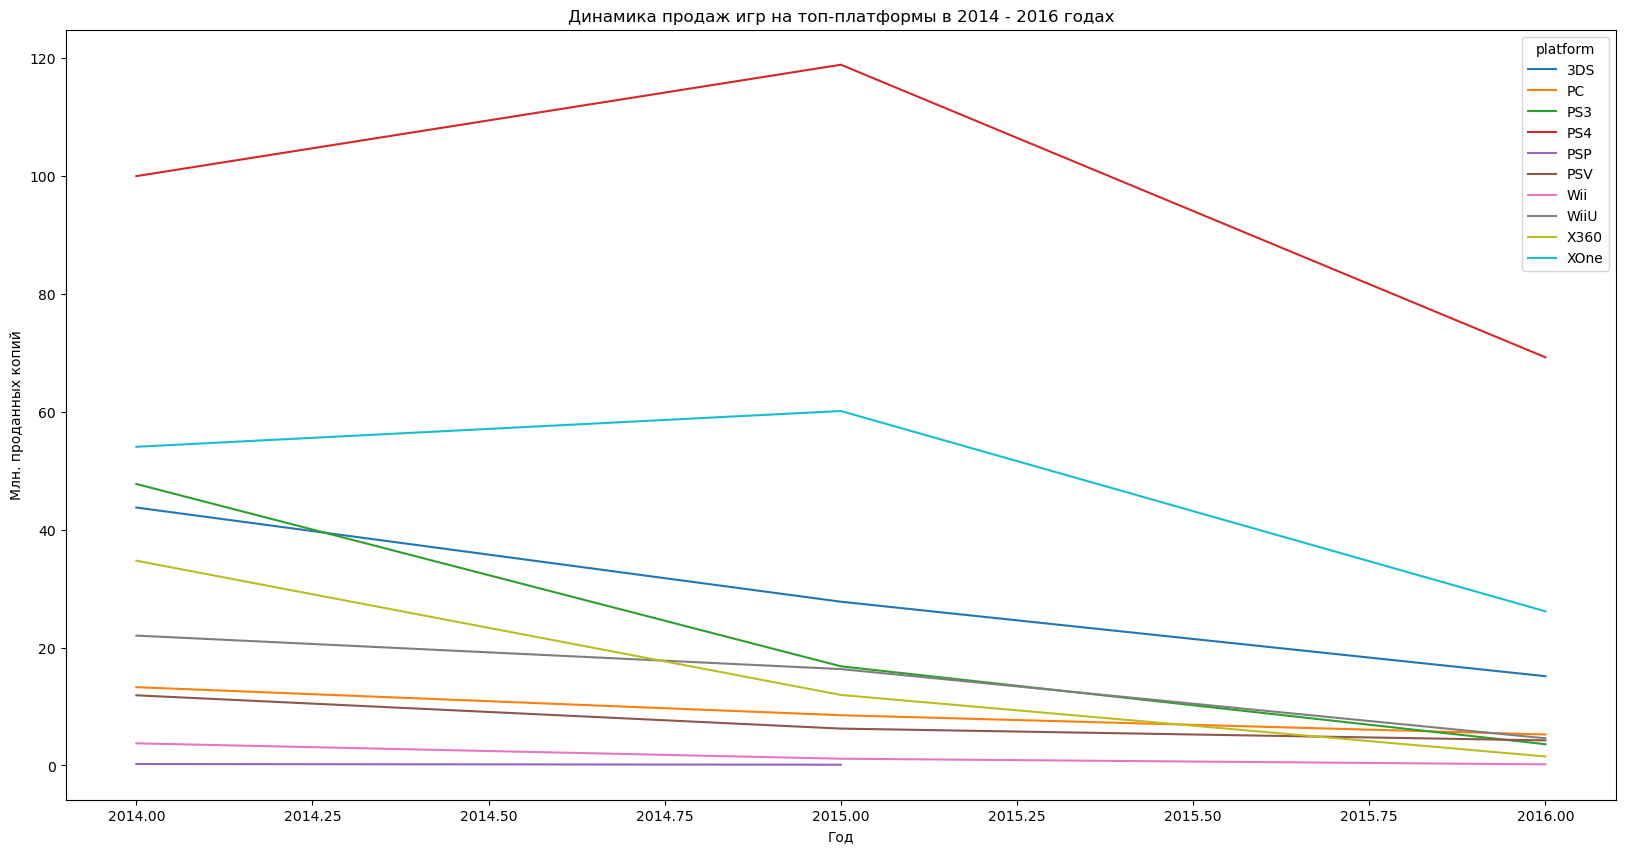

In [57]:
# Построим график динамики продаж по платформам на исследуемый период 
data_relevant.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(20,10))
plt.title('Динамика продаж игр на топ-платформы в 2014 - 2016 годах')
plt.xlabel('Год')
plt.ylabel('Млн. проданных копий');
data_relevant.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
Можно подправить подписи оси х, в виде целых 2014, 2015 ... 

Исходя из данных графика можно сделать вывод, что лидерами продаж на 2016 год представляются PS4, XOne и 3DS, то есть самые новые на тот момент консоли Sony, Micosoft и Nintendo. Однако трех платформ может быть слишком мало для анализа, возьмем еще две - PC и WiiU. Вероятно, они и будут наиболее потенциально прибыльными в 2017 году. Создадим отдельный датафрейм для них.

In [58]:
#platforms_relevant_2016_list = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']
#platforms_relevant_2016 = data_relevant.query('platform in @platforms_relevant_2016_list')
#platforms_relevant_2016.info()
#platforms_relevant_2016.head()

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Срезая старые платформы, например PS3, мы не узнаем реальную долю рынка, которую занимают PS3 + PS4, эту долю можно использовать как прогнозную, которую займет PS4, после полного ухода PS3
        
При создании актуальной выборки стоит удалить только старые игры, не изменяя перечень платформ

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> То есть мы не выделяем какие-то топовые плафтормы, а оставляем их все? Твое утверждение о необходимости отсечь только игры мне кажется вполне разумным. Видимо, я не так интерпретировал текст задания. Тогда в качетсве основного датасета для исследования стоит использовать data_relevant, который отрезает только старые игры. Я закомментирую часть строк в коде дальше, чтобы не удалять, если я вдруг снова что-то не так понял

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

In [59]:
data_relevant.info()
data_relevant.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No data,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No data,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No data,7.98


#### Ящик с усами

Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам по потенциально прибыльным платформам

,total_sales
count,1689.000000
mean,0.431883
std,1.056109
min,0.010000
25%,0.030000
50%,0.100000
75%,0.350000
max,14.630000


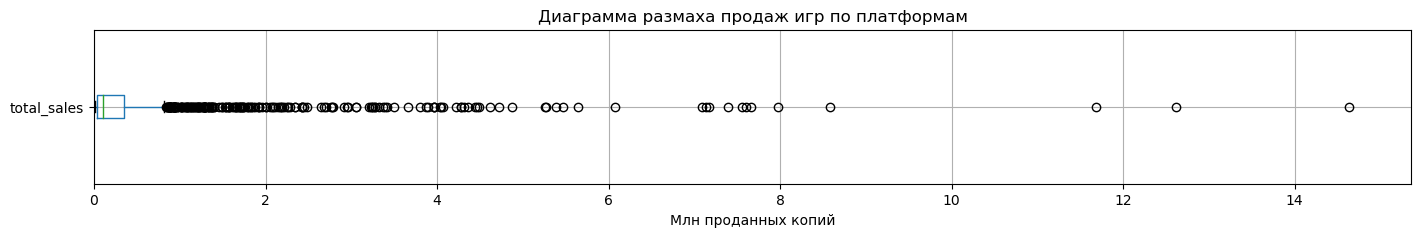

In [60]:
fig, ax = plt.subplots(figsize = (17,2))
#ax = platforms_relevant_2016.pivot_table(index=['platform','name'] , values='total_sales', aggfunc='sum').boxplot(vert = False, ax =ax)
ax = data_relevant.pivot_table(index=['platform','name'] , values='total_sales', aggfunc='sum').boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продаж игр по платформам')
ax.set_xlabel('Млн проданных копий')
ax.set_xlim(0);

data_relevant.pivot_table(index=['platform','name'] , values='total_sales', aggfunc='sum').describe()

Наблюдается большое количество выбросов, с этим также связана большая разница между средним и медианой. Изучим пределы нормальных значений подробнее

,total_sales
count,1689.000000
mean,0.431883
std,1.056109
min,0.010000
25%,0.030000
50%,0.100000
75%,0.350000
max,14.630000


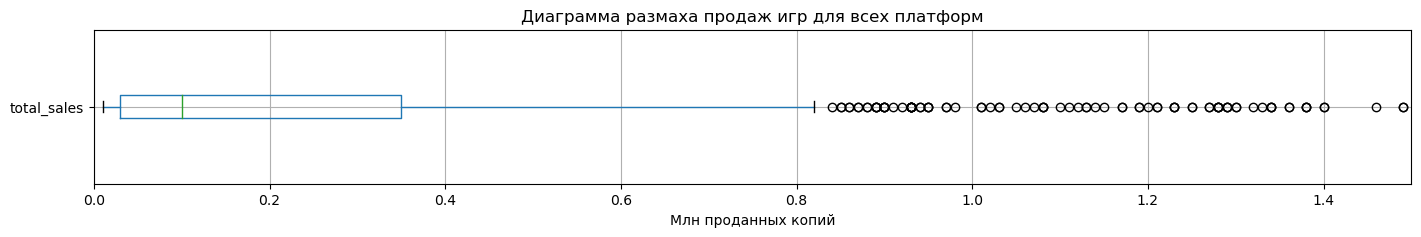

In [61]:
# зададим ограничение по оси x
fig, ax = plt.subplots(figsize = (17,2))
#ax = platforms_relevant_2016.pivot_table(index=['platform','name'] , values='total_sales', aggfunc='sum').boxplot(vert = False, ax =ax)
ax = data_relevant.pivot_table(index=['platform','name'] , values='total_sales', aggfunc='sum').boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продаж игр для всех платформ')
ax.set_xlabel('Млн проданных копий')
ax.set_xlim(0,1.5);

data_relevant.pivot_table(index=['platform','name'] , values='total_sales', aggfunc='sum').describe()

Отсюда можно сделать вывод, что нормальные значения количества проданных копий находятся в промежутке до 0.83 млн, медиана составляет 100 тыс. проданных копий.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


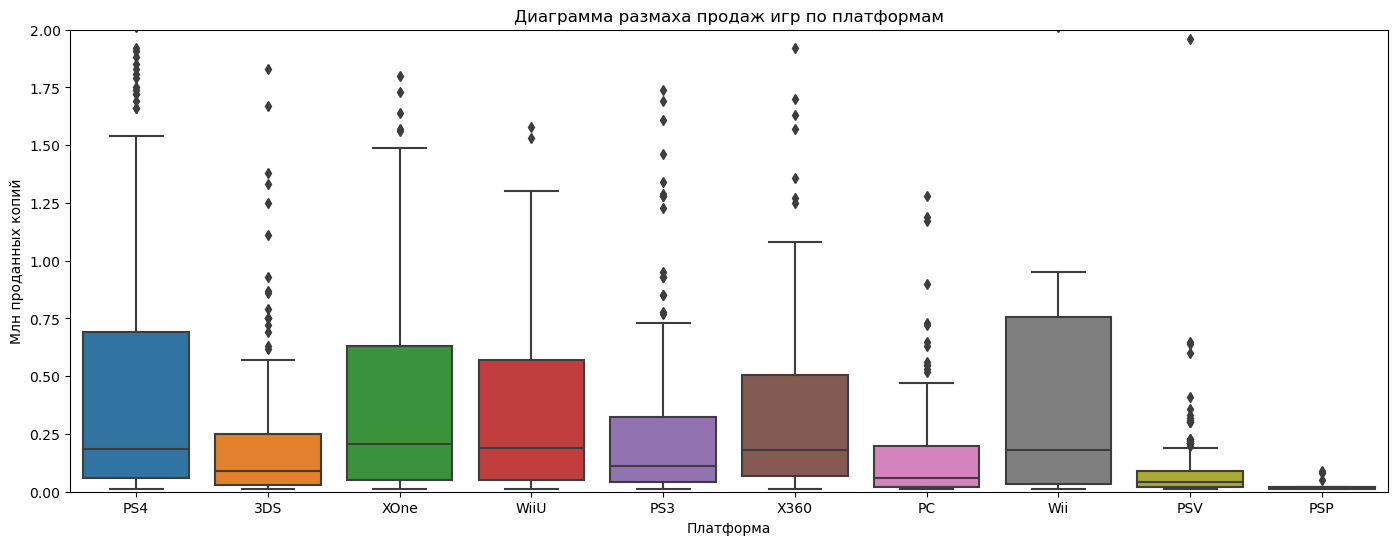

In [62]:
plt.figure(figsize=(17,6))
#ax = sns.boxplot(data=platforms_relevant_2016, x='platform', y='total_sales');
ax = sns.boxplot(data=data_relevant, x='platform', y='total_sales');
ax.set_title('Диаграмма размаха продаж игр по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Млн проданных копий')
ax.set_ylim(0,2);

data_relevant.groupby('platform')['total_sales'].describe()

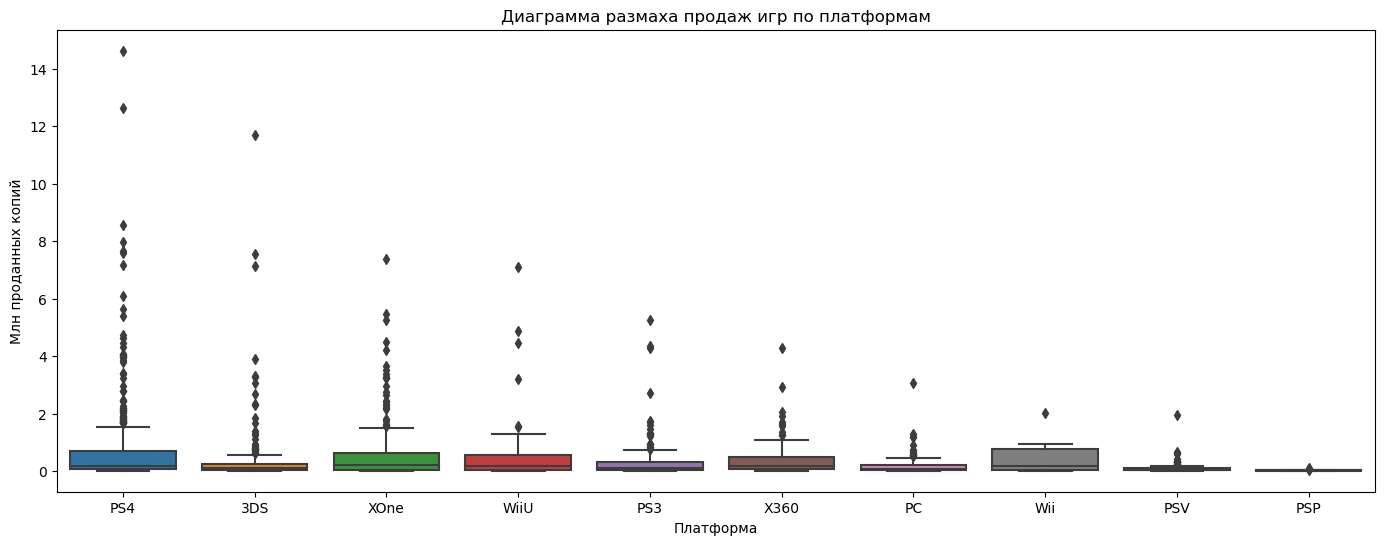

In [63]:
plt.figure(figsize=(17,6))
ax = sns.boxplot(data=data_relevant, x='platform', y='total_sales');
ax.set_title('Диаграмма размаха продаж игр по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Млн проданных копий');

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры на платформе/жанре, какая из них более стабильна в продажах...
        
        
Две хорошие статьи про диаграмму размаха
        
[Ящики, усы и скрипки](https://habr.com/ru/articles/533726/) 
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)
       
https://stackoverflow.com/questions/22028064/matplotlib-boxplot-without-outliers        

На графике видно разницу в нормальном значении количества проданных копий игр на платформах. Таким образом: 
1) Наибольшее количество игр за исследуемый период было продано на PC PS4(376), PSV(295), XOne(228)

2) Наибольшие продажи по количеству копий приходятся на PS4 - нормальное значения проданных копий игры там в районе 1.64 млн, затем идет XOne с 1,5 млн и WiiU - 1,35 млн копий. 

3) Максимальное количество проданных копий одной игры принадлежит PS4 - 14.63 млн копий, на втором месте 3DS - 11.68 млн копий и PC - 7.39 млн копий

4) Медианные значения также отличаются у всех платформ, однако у трех платформ-лидеров по продажам они находятся в районе 0.2 млн копий.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, ты используешь диаграмму размаха для определения успешности платформы, молодец
        
Для более полной оценки продаж на платформах стоит добавить график со 100% масштабом, посмотреть на максимальные продажи 

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

__Не стоит ограничивать перечень платформ из актуального периода для оценки прибыльности платформ__
        
диаграмму размаха перерисовать на актуальной выборке с полным перечнем платформ
         

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Спасибо, исправил

#### Влияние рейтингов на продажи

Изучим, какое влияние на продажи имеют отзывы пользователей и критиков, на примере PS4

In [64]:
data_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No data,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No data,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No data,7.98


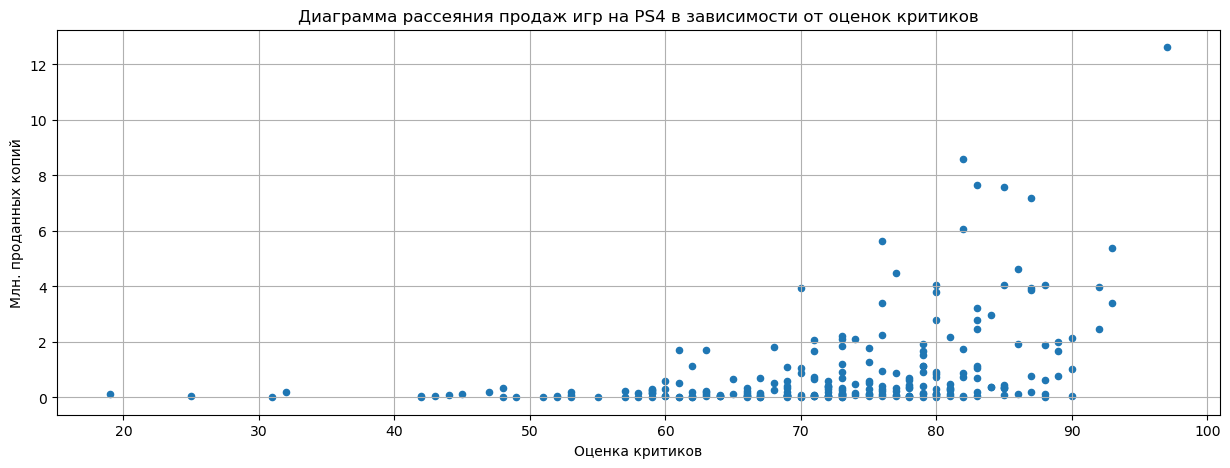

In [65]:
PS4 = data_relevant.query('platform == "PS4"')
PS4.plot(kind='scatter', grid=True, x='critic_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на PS4 в зависимости от оценок критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Млн. проданных копий");


In [66]:
PS4['total_sales'].corr(PS4['critic_score']).round(2)

0.4

Судя по графику, можно сделать вывод, что количество продаж растет по мере роста оценки критиков, однако показатель корреляции не слишком велик, что говорит о слабой связи этих параметров. Вероятно, дело в пропущенных значениях в столбце "critic_score"

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> на проектах стоит снижать размерность выводимой информации, где не требуется максимальная точность, до одного или двух знаков после запятой
        
        0.406567902061781

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Округлил с помощью round(), спасибо

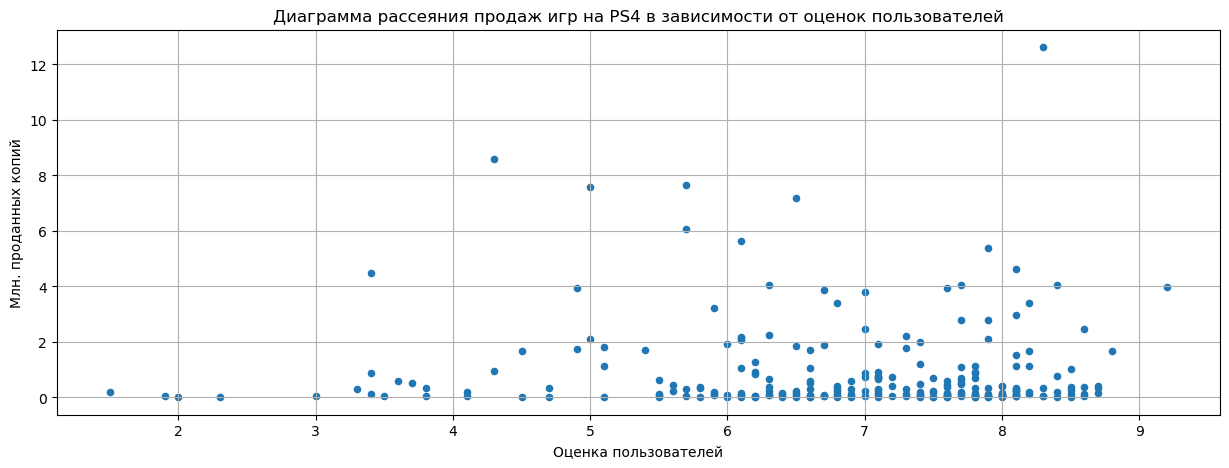

In [67]:
PS4 = data_relevant.query('platform == "PS4"')
PS4.plot(kind='scatter', grid=True, x='user_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на PS4 в зависимости от оценок пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Млн. проданных копий");

In [68]:
PS4['total_sales'].corr(PS4['user_score']).round(2)

-0.04

Изучив график и показатель корреляции близкий к нулю, можно прийти к выводу, что оценки пользователей практически не сказываются на объеме продаж

Повторим это с другими актуальными платформами

'Коэффициент корреляции равен XOne: 0.43'

'Коэффициент корреляции равен 3DS: 0.31'

'Коэффициент корреляции равен PC: 0.17'

'Коэффициент корреляции равен WiiU: 0.37'

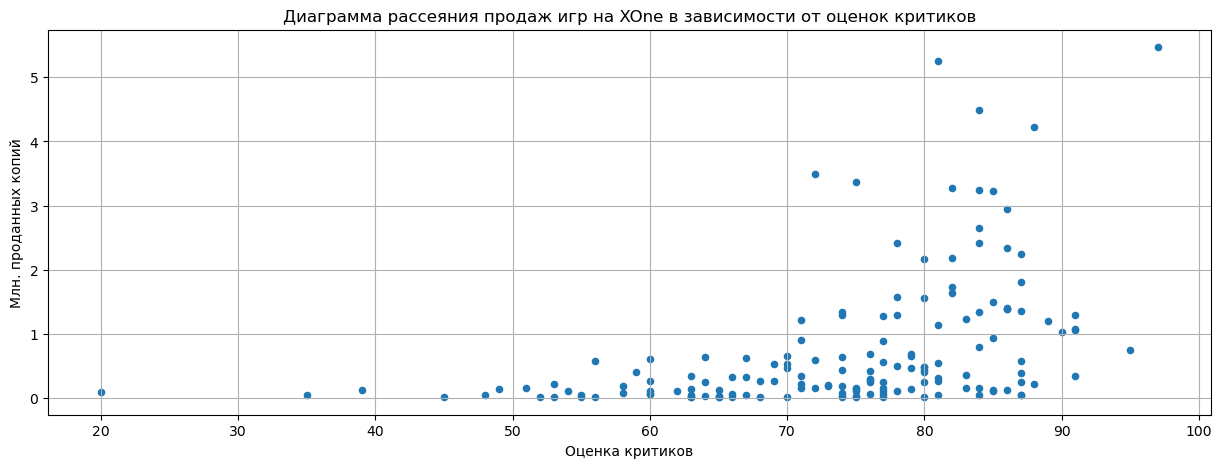

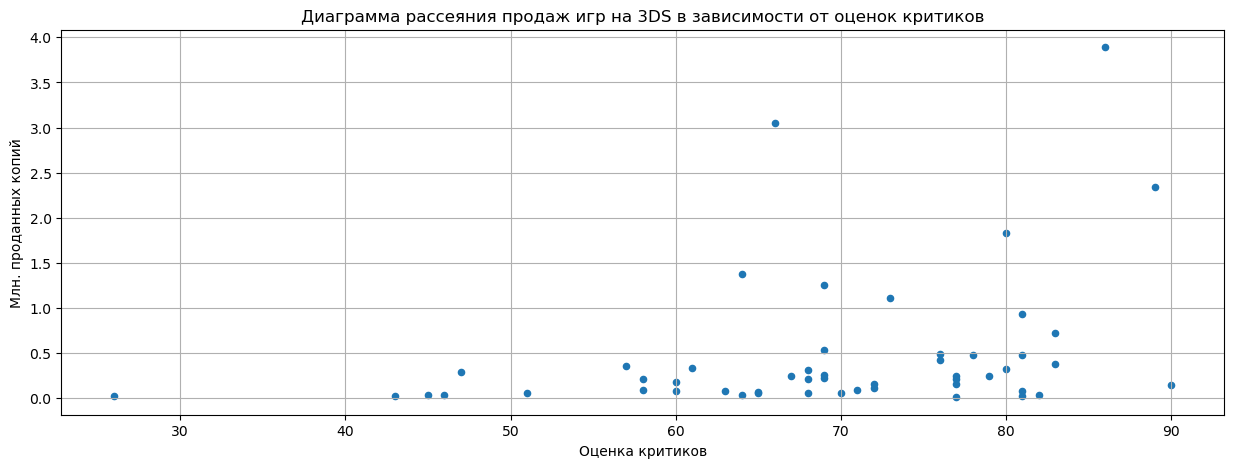

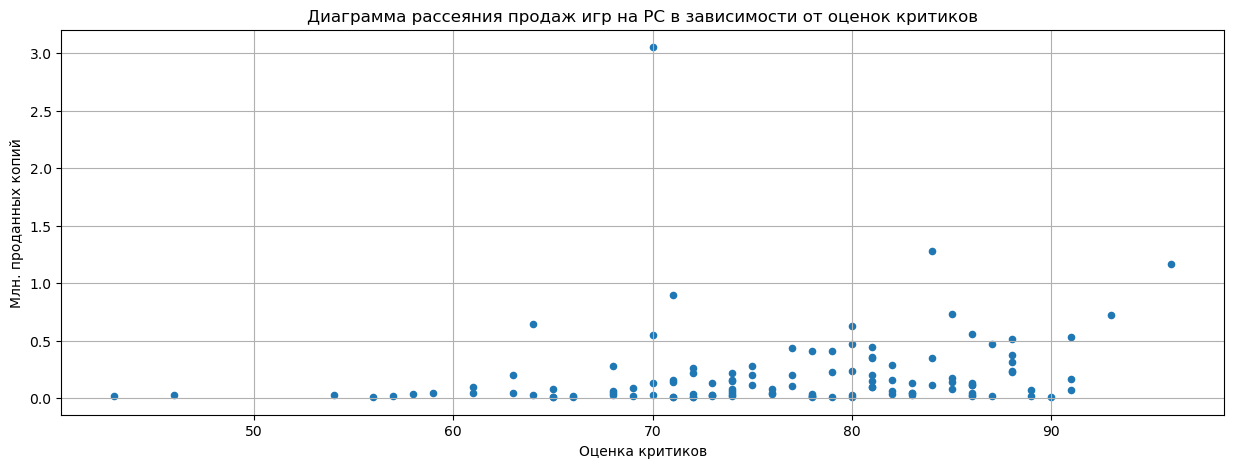

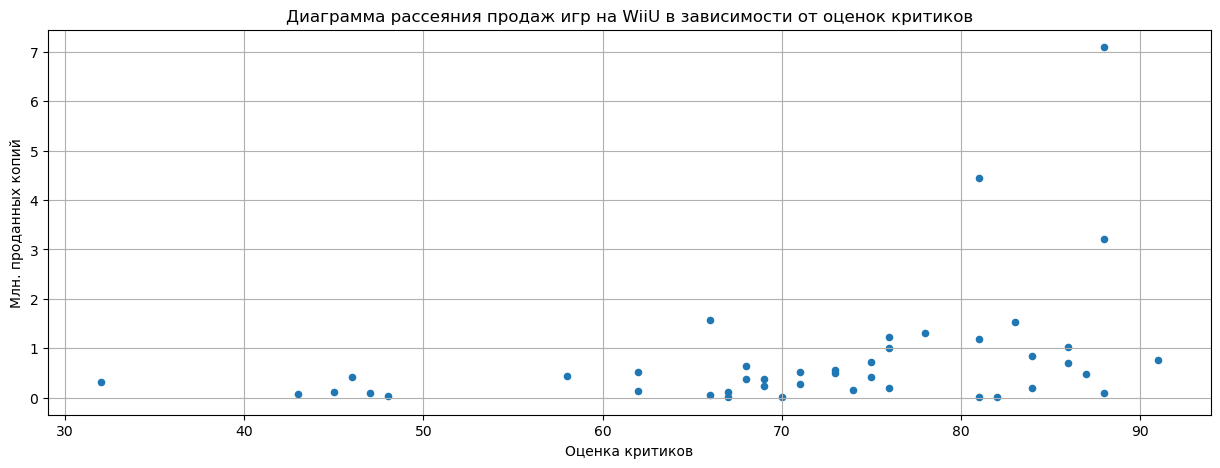

In [69]:
XOne = data_relevant.query('platform == "XOne"')
XOne.plot(kind='scatter', grid=True, x='critic_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на XOne в зависимости от оценок критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Млн. проданных копий");

XOne_corr = XOne['total_sales'].corr(XOne['critic_score']).round(2)
display(f'Коэффициент корреляции равен XOne: {XOne_corr}')

TDS = data_relevant.query('platform == "3DS"')
TDS.plot(kind='scatter', grid=True, x='critic_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на 3DS в зависимости от оценок критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Млн. проданных копий");


TDS_corr= TDS['total_sales'].corr(TDS['critic_score']).round(2)
display(f'Коэффициент корреляции равен 3DS: {TDS_corr}')
                                   
                                   
PC = data_relevant.query('platform == "PC"')
PC.plot(kind='scatter', grid=True, x='critic_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на PC в зависимости от оценок критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Млн. проданных копий");

PC_corr= PC['total_sales'].corr(PC['critic_score']).round(2)
display(f'Коэффициент корреляции равен PC: {PC_corr}')


WiiU = data_relevant.query('platform == "WiiU"')
WiiU.plot(kind='scatter', grid=True, x='critic_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на WiiU в зависимости от оценок критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Млн. проданных копий");

WiiU_corr= WiiU['total_sales'].corr(WiiU['critic_score']).round(2)
display(f'Коэффициент корреляции равен WiiU: {WiiU_corr}')

'Коэффициент корреляции равен XOne: -0.07'

'Коэффициент корреляции равен 3DS: 0.22'

'Коэффициент корреляции равен PC: -0.07'

'Коэффициент корреляции равен WiiU: 0.41'

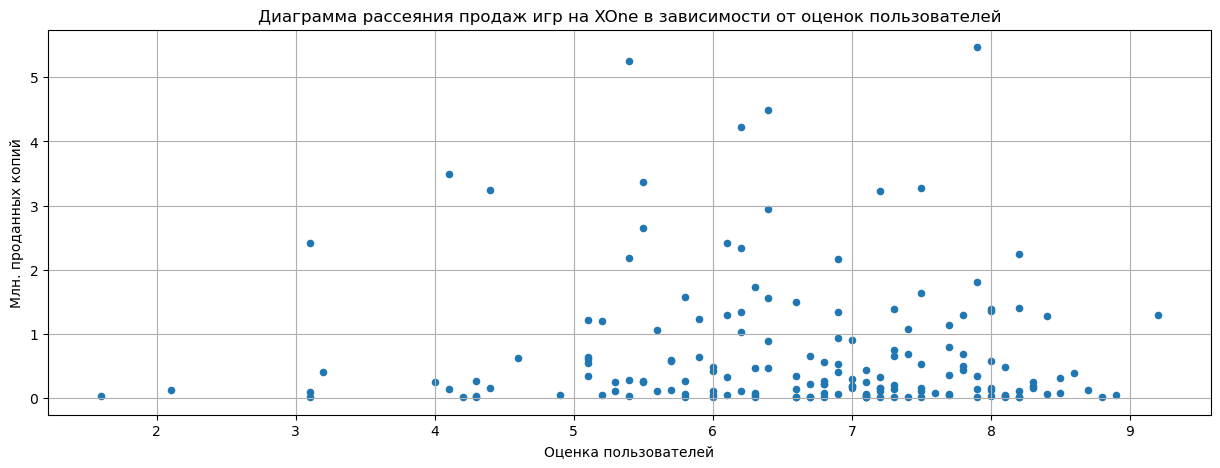

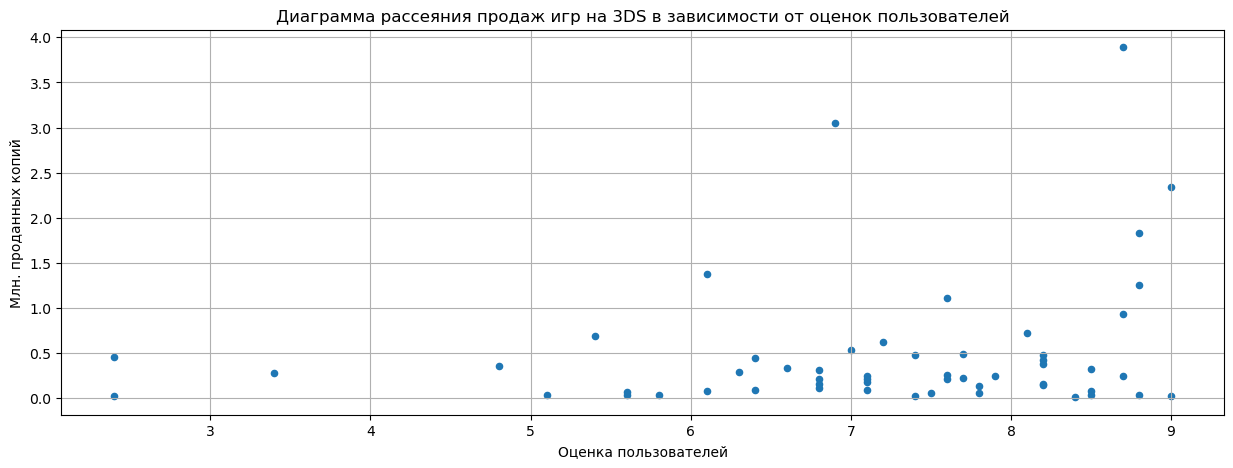

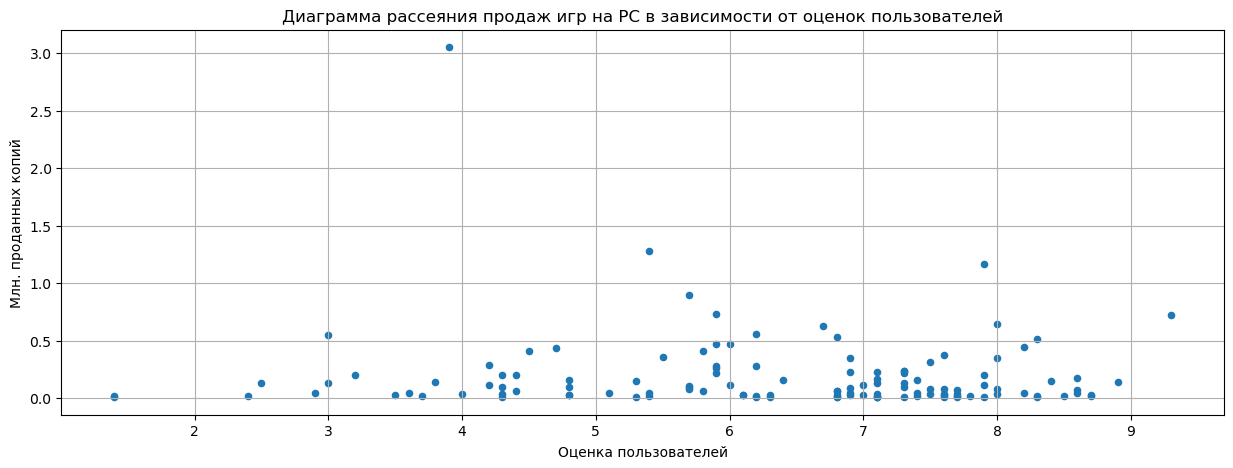

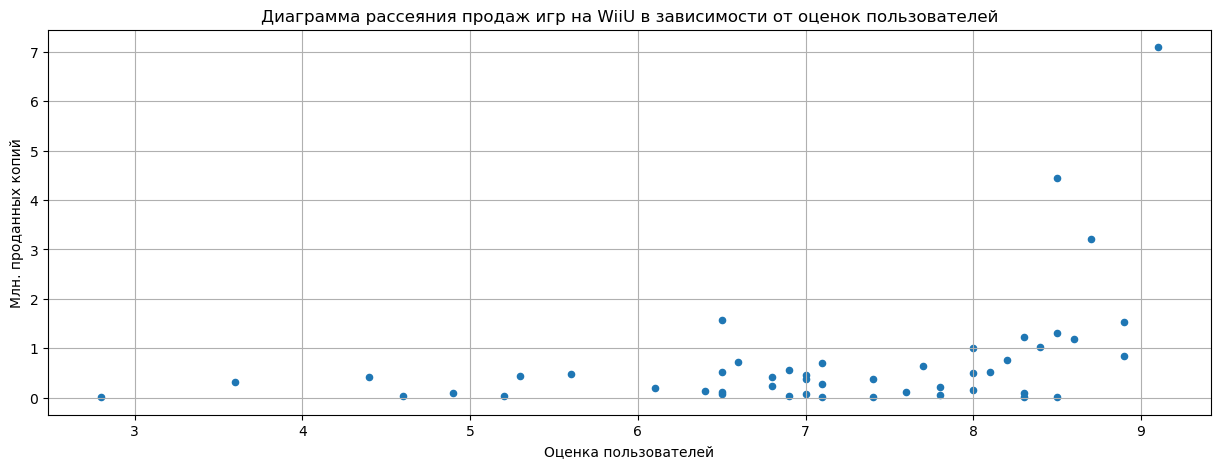

In [70]:
XOne.plot(kind='scatter', grid=True, x='user_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на XOne в зависимости от оценок пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Млн. проданных копий");

XOne_corr1 = XOne['total_sales'].corr(XOne['user_score']).round(2)
display(f'Коэффициент корреляции равен XOne: {XOne_corr1}')

TDS.plot(kind='scatter', grid=True, x='user_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на 3DS в зависимости от оценок пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Млн. проданных копий");

TDS_corr1 = TDS['total_sales'].corr(TDS['user_score']).round(2)
display(f'Коэффициент корреляции равен 3DS: {TDS_corr1}')

PC.plot(kind='scatter', grid=True, x='user_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на PC в зависимости от оценок пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Млн. проданных копий");

PC_corr1 = PC['total_sales'].corr(PC['user_score']).round(2)
display(f'Коэффициент корреляции равен PC: {PC_corr1}')

WiiU.plot(kind='scatter', grid=True, x='user_score', y='total_sales', figsize=(15,5))
plt.title('Диаграмма рассеяния продаж игр на WiiU в зависимости от оценок пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Млн. проданных копий");

WiiU_corr1 = WiiU['total_sales'].corr(WiiU['user_score']).round(2)
display(f'Коэффициент корреляции равен WiiU: {WiiU_corr1}')


Изучив данные диаграмм рассеяния, нельзя сказать что оценки пользователей и критиков оказывают большое влияние на объемы продаж. Пользовательская оценка имеет значительно меньший вес и практически не учитывается, за исключением консолей Nintendo WiiU и 3DS, возможно, это связано с особенностями японского рынка, на котором они широко представлены

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Сравнение показателей на нескольких платформах, позволяет набрать вес твоему исследованию, молодец

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных)
       
        
__Достаточно много игр с высокой оценкой критиков и слабой выручкой__
        
Приведу пример ложной корреляции, весьма известный в статистической литературе. Была исследована корреляционная связь между числом аистов, свивших гнезда в южных районах Швеции, и рождаемостью в эти же годы в Швеции. Расчёты, выполненные ради шутки, показали существенную положительную корреляцию между этими явлениями, хотя любому понятно, что это ложная корреляция.

Ещё пример ложной корреляции между приемом на работу новых менеджеров и созданием новых производственных мощностей. Возможно, именно менеджеры являются «причиной» капиталовложений в новые производственные мощности? Или же, наоборот, создание новых производственных мощностей послужило «причиной» приема на работу новых менеджеров?

Например, можно обнаружить сильную положительную связь (корреляцию) между разрушениями, вызванными пожаром, и числом пожарных, тушивших пожар. Следует ли заключить, что пожарные вызывают разрушения? Конечно, наиболее вероятное объяснение этой корреляции состоит в том, что размер пожара (внешняя переменная, которую забыли включить в исследование) оказывает влияние, как на масштаб разрушений, так и на числе привлеченных пожарных (т. е. чем больше пожар, тем большее количество пожарных вызывается на его тушение) .

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Получается, что в нашем случае ни оценки критиков, ни пользовательские не оказывают сильного влияния на продажи?

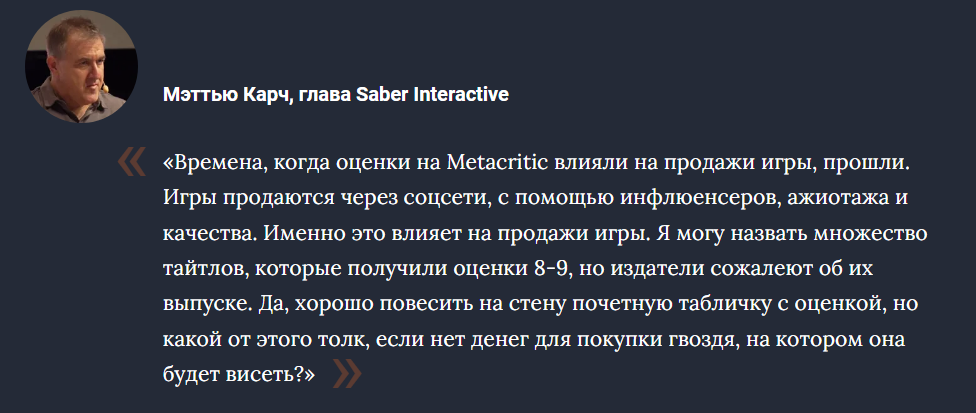

#### Продажи игр по жанрам

genre,Action,Shooter,Sports,Role-Playing,Misc,Fighting,Racing,Platform,Adventure,Simulation,Strategy,Puzzle
total_sales,199.36,170.94,109.48,101.44,37.55,28.22,27.52,18.09,17.55,13.13,3.96,2.21


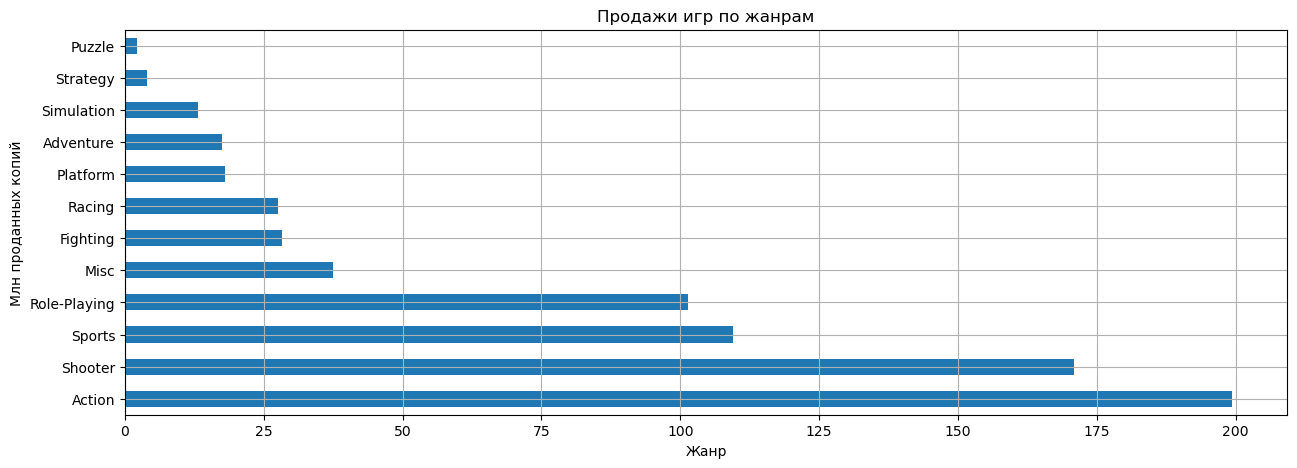

In [71]:
# Изучим наиболее и наименее популярные жанры игр
#display(platforms_relevant_2016.pivot_table(index='genre', values='total_sales', aggfunc='sum')
#        .sort_values(by='total_sales', ascending=False).transpose())
display(data_relevant.pivot_table(index='genre', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', ascending=False).transpose())
# Построим столбчатую диаграмму для наглядности
#platforms_relevant_2016.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='barh', grid=True, figsize=(15,5))
data_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='barh', grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br /> Стоит  развернуть график в горизонтальные бары, если надписи оси Х не умещаются в горизонтальном виде

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> ... Так?
        
        

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br />  
    <font size="3", color = "black">
<br /> Разворот получился, осталось поправить названия осей

Из графиков видно, что самыми продаваемыми жанрами представляется "Action", "Shooter" и "Sports", к наименее популярным относятся "Simulation", "Strategy" и "Puzzle"
Также среди в списке имеется жанр "Mics", что, вероятно, означает "Miscellaneous game", то есть игру, чья жанровая принадлежность размыта и четко не определена.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />Круговая диаграмма малоинформативна для кол-ва категорий более 5-ти, невозможно за 5 сек. сравнить и решить какой вид жанра является отстающим, а самое главное определить — насколько сильно они различаются друг от друга
        
       
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Спасибо, удалил круговую, добавил диаграммы размаха

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


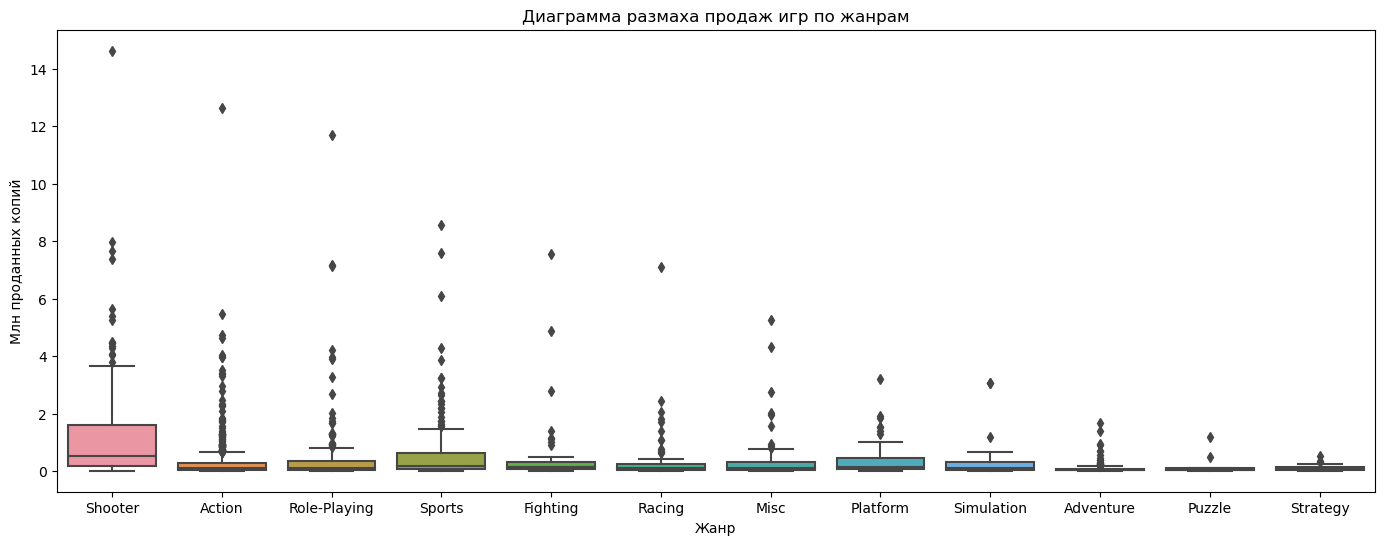

In [72]:
plt.figure(figsize=(17,6))
ax = sns.boxplot(data=data_relevant, x='genre', y='total_sales');
ax.set_title('Диаграмма размаха продаж игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Млн проданных копий');

data_relevant.groupby('genre')['total_sales'].describe()

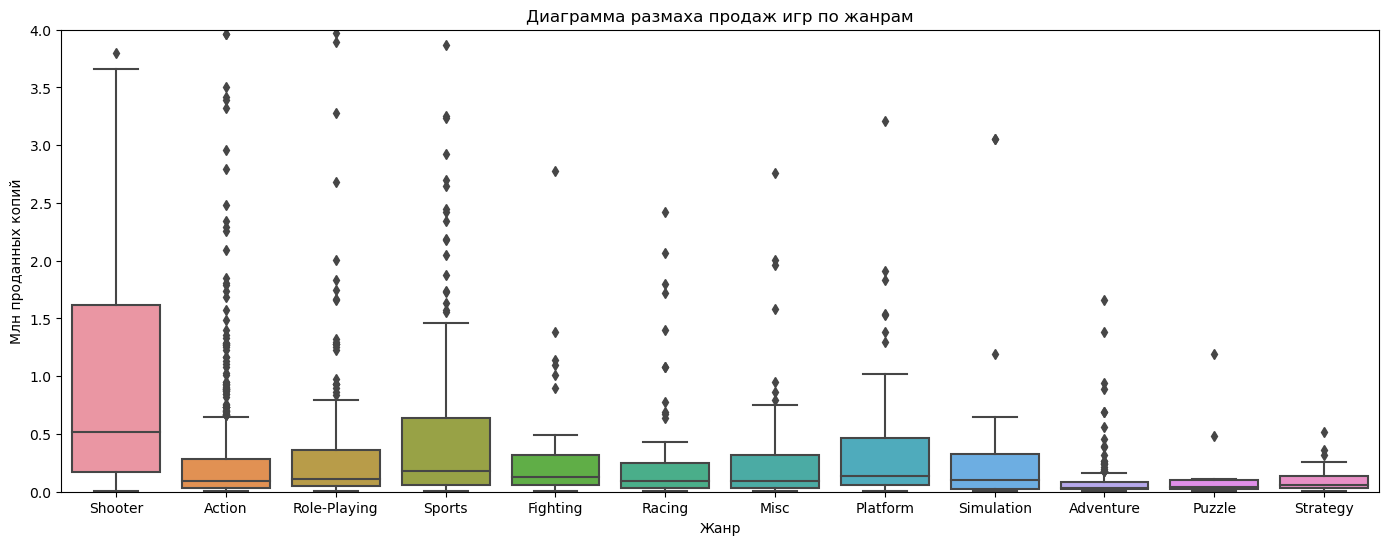

In [73]:
plt.figure(figsize=(17,6))
ax = sns.boxplot(data=data_relevant, x='genre', y='total_sales');
ax.set_title('Диаграмма размаха продаж игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Млн проданных копий')
ax.set_ylim(0,4);

Наиболее прибыльным жанром, судя по диаграмме представляется Shooter - верхняя граница нормальных значений в этом жанре находится в районе 3.8 млн проданных копий, за ним следует Sports - с границей в районе 1.5 млн копий, третья строчка за Platform c 1 млн проданных копий - медианные продажи этих жанров также закономерно выше других. 

Жанр Action, который занимает первенство по совокупным продажам здесь находится только на пятой строчке. Вероятно, суммарное количество проданных копий в этом жанре, обусловлено большим количеством выбросоа, что также видно на диаграмме размаха.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Часть выбросов у экшена «попадают» в размер ящика у шутера, то что для экшена выброс, для шутера третий квартиль. 
        
Для составления полной картины → можно посмотреть на динамику продаж жанров по годам        

### Потрет пользователя в разных регионах

Составим потреты пользователей из трех регионов, по которым имеются данные: Северная Америка, Европа и Япония. Для этого изучим данные о наиболее популярных платформах, жанрах и влияние рейтинговой системы ESRB на продажи в отдельных регоинах

#### Популярность платформ по регионам

platform,PS4,XOne,X360,3DS,PS3,WiiU,PC,PSV,Wii,PSP
na_sales,98.61,81.27,28.3,22.64,22.05,19.36,7.23,2.52,2.08,0.0


platform,PS4,XOne,PS3,PC,3DS,X360,WiiU,PSV,Wii,PSP
eu_sales,130.04,46.25,25.54,17.97,16.12,15.49,13.15,3.53,2.59,0.0


platform,3DS,PS4,PSV,PS3,WiiU,PSP,XOne,X360,PC,Wii
jp_sales,44.24,15.02,14.54,11.22,7.31,0.36,0.32,0.08,0.0,0.0


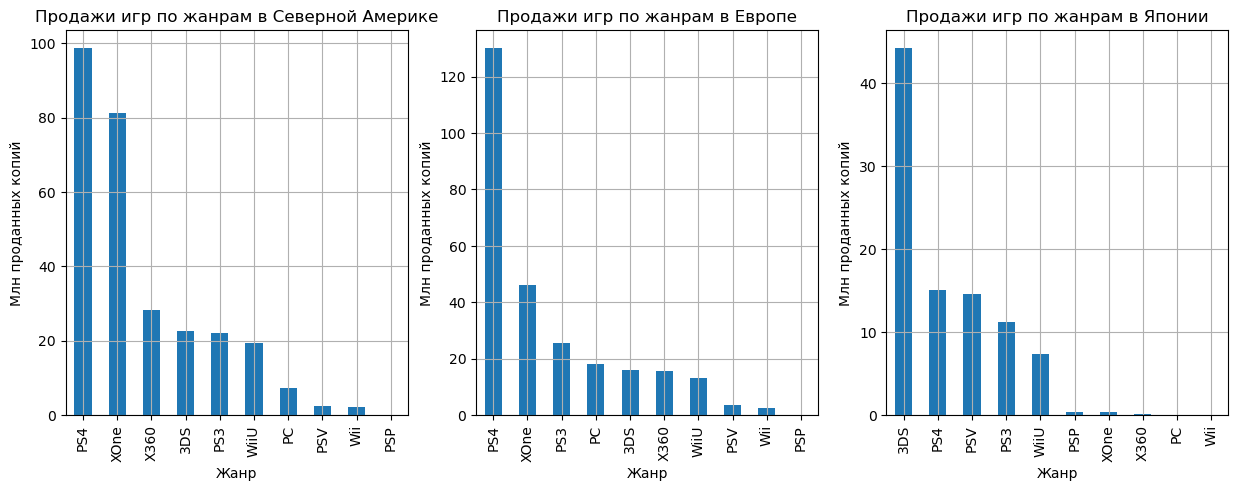

In [74]:
# Визуализируем для наглядности
plt.subplot(1,3,1)
#platforms_relevant_2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
data_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).transpose())

plt.subplot(1,3,2)
#platforms_relevant_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
data_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).transpose())

plt.subplot(1,3,3)
#platforms_relevant_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
data_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).transpose())


<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов нарисованы, молодец, значительное влияние на портрет оказывает период с 2009 г. и способ создания актуальной выборки, можем совершить ошибку при формировании рекомендации маркетологам
        
Стоит оформить графики раздела TOП-5:

+ корректно выбрать актуальный период;
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Я пытался

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, молодец

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
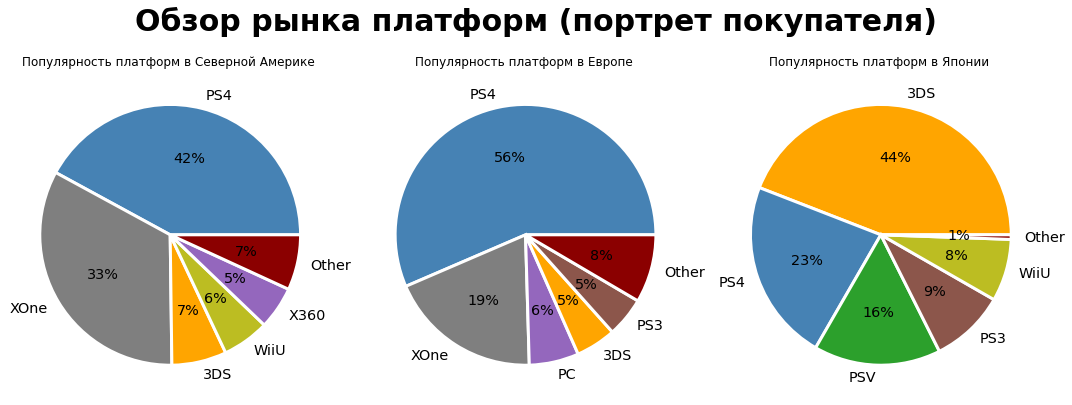        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


In [75]:
#plt.subplot(1,3,1)
#platforms_relevant_2016.groupby('platform')['na_sales'].sum().sort_values().plot(kind='pie', figsize=(15,20), autopct='%.2f')
#plt.title('Популярность платформ в Северной Америке');

#plt.subplot(1,3,2)
#platforms_relevant_2016.groupby('platform')['eu_sales'].sum().sort_values().plot(kind='pie', autopct='%.2f')
#plt.title('Популярность платформ в Европе');


#plt.subplot(1,3,3)
#platforms_relevant_2016.groupby('platform')['jp_sales'].sum().sort_values().plot(kind='pie', autopct='%.2f')
#plt.title('Популярность платформ в Японии');

In [76]:
# Воспользуемся категоризацией данных, чтобы получить others
na_platforms = data_relevant.pivot_table(index='platform', values ='na_sales', 
                                         aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platforms = na_platforms.reset_index() 

na_top_platforms = list(na_platforms['platform'][0:5])

def categorize_platform_na(row):
    if row['platform'] in na_top_platforms:
        return row['platform']
    else:
        return 'other'
na_platforms['category'] = na_platforms.apply(categorize_platform_na, axis=1)

display(na_platforms)

# Повторим для Европы
eu_platforms = data_relevant.pivot_table(index='platform', values ='eu_sales', 
                                         aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platforms = eu_platforms.reset_index() 

eu_top_platforms = list(eu_platforms['platform'][0:5])

def categorize_platform_eu(row):
    if row['platform'] in eu_top_platforms:
        return row['platform']
    else:
        return 'other'
eu_platforms['category'] = eu_platforms.apply(categorize_platform_eu, axis=1)

display(eu_platforms)

# И для Японии
jp_platforms = data_relevant.pivot_table(index='platform', values ='jp_sales', 
                                         aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platforms = jp_platforms.reset_index() 

jp_top_platforms = list(jp_platforms['platform'][0:5])

def categorize_platform_jp(row):
    if row['platform'] in jp_top_platforms:
        return row['platform']
    else:
        return 'other'
jp_platforms['category'] = jp_platforms.apply(categorize_platform_jp, axis=1)

display(jp_platforms)

,platform,na_sales,category
0,PS4,98.61,PS4
1,XOne,81.27,XOne
2,X360,28.30,X360
3,3DS,22.64,3DS
4,PS3,22.05,PS3
5,WiiU,19.36,other
6,PC,7.23,other
7,PSV,2.52,other
8,Wii,2.08,other
9,PSP,0.00,other


,platform,eu_sales,category
0,PS4,130.04,PS4
1,XOne,46.25,XOne
2,PS3,25.54,PS3
3,PC,17.97,PC
4,3DS,16.12,3DS
5,X360,15.49,other
6,WiiU,13.15,other
7,PSV,3.53,other
8,Wii,2.59,other
9,PSP,0.00,other


,platform,jp_sales,category
0,3DS,44.24,3DS
1,PS4,15.02,PS4
2,PSV,14.54,PSV
3,PS3,11.22,PS3
4,WiiU,7.31,WiiU
5,PSP,0.36,other
6,XOne,0.32,other
7,X360,0.08,other
8,PC,0.00,other
9,Wii,0.00,other


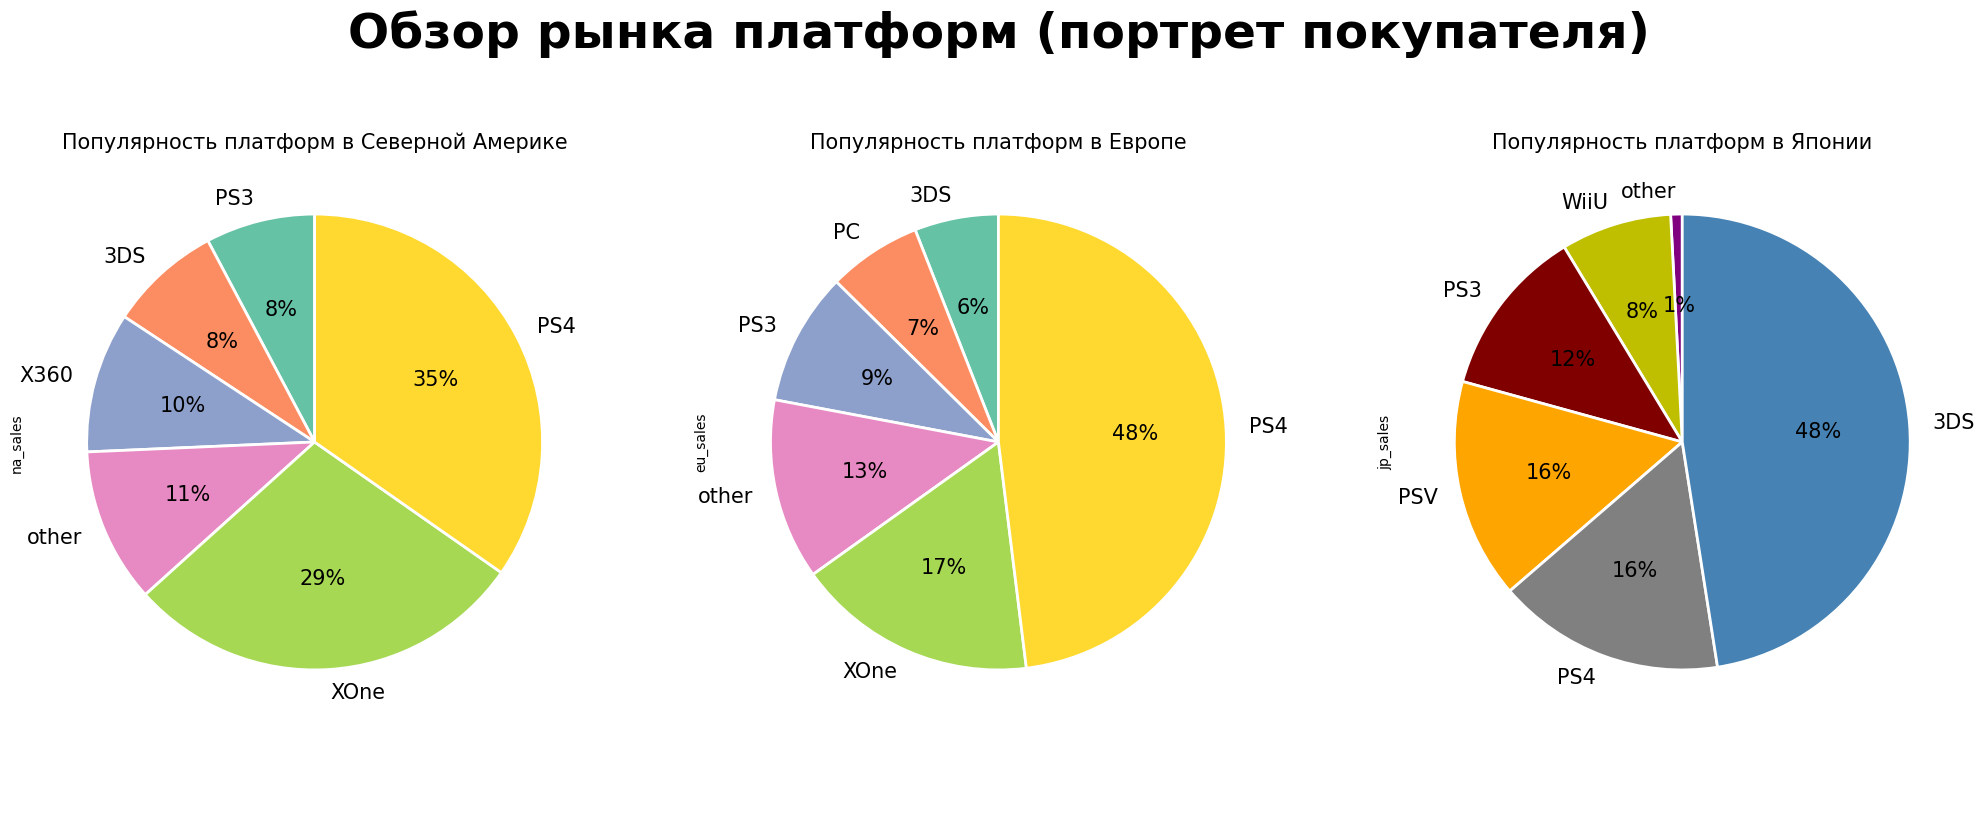

In [77]:
fig = plt.figure(figsize=(25,10))
plt.title('Обзор рынка платформ (портрет покупателя)', fontsize=35, weight='bold')
plt.axis('off')

ax1 = fig.add_subplot(1,3,1)
ax1= na_platforms.groupby('category')['na_sales'].sum().sort_values().plot(kind='pie',
                                                                           fontsize=15,
                                                                           startangle = 90, 
                                                                           autopct='%1.f%%', 
                                                                           colors=sns.color_palette('Set2'),
                                                                           wedgeprops = {"edgecolor" : "w",'linewidth': 2})
plt.title('Популярность платформ в Северной Америке', fontsize = 15);

ax2 = fig.add_subplot(1,3,2)
ax2 = eu_platforms.groupby('category')['eu_sales'].sum().sort_values().plot(kind='pie',
                                                                           fontsize=15,
                                                                           startangle = 90, 
                                                                           autopct='%1.f%%', 
                                                                           colors=sns.color_palette('Set2'),
                                                                           wedgeprops = {"edgecolor" : "w",'linewidth': 2})
plt.title('Популярность платформ в Европе', fontsize = 15);

ax3 = fig.add_subplot(1,3,3)
ax3= jp_platforms.groupby('category')['jp_sales'].sum().sort_values().plot(kind='pie',
                                                                           fontsize=15,
                                                                           startangle = 90, 
                                                                           autopct='%1.f%%', 
                                                                           colors=[ 'purple', 'y',
                                                                                   'maroon','orange',
                                                                                   'grey','steelblue'],
                                                                           wedgeprops = {"edgecolor" : "w",'linewidth': 2})
plt.title('Популярность платформ в Японии', fontsize = 15);


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br />Для задания более приятных цветов явно должна быть какая-то функция с палитрой? Я нашел кое-что, но, может, есть еще какой-то способ? 
    Еще вопрос как можно присвоить конкретной платформе конкретный цвет? 
    Еще с крутилкой проблема, я так и не нашел угол, который был бы как в образце. 
    А еще не понял, как избавиться от рамки с осями

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Пример в бонусе
        
         я так и не нашел угол, который был бы как в образце.
        
https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/        

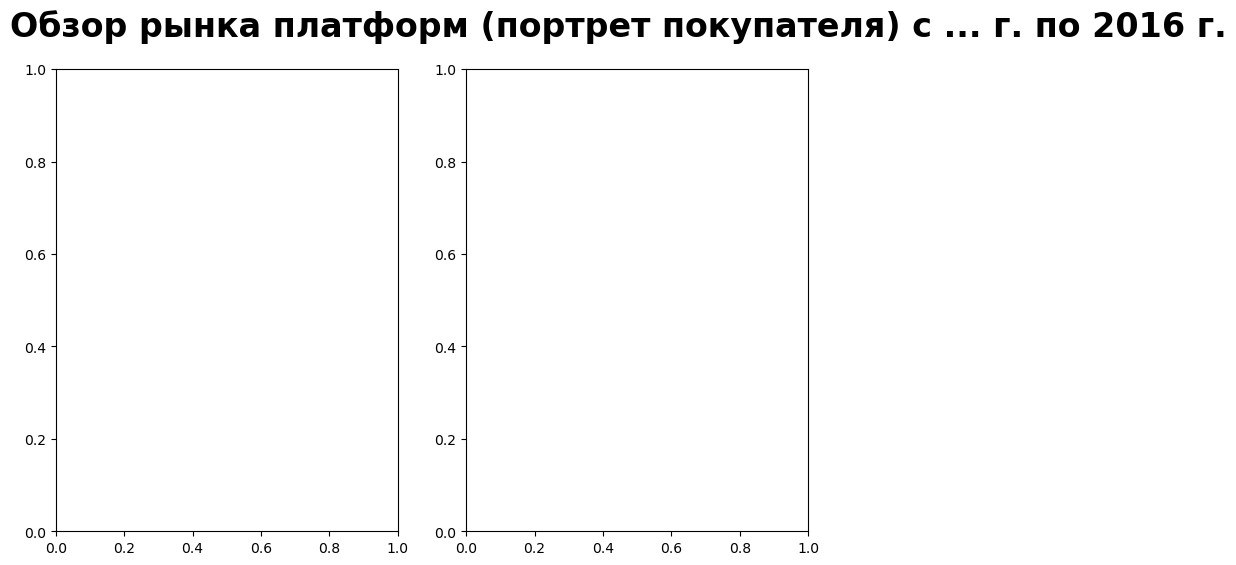

In [78]:
fig, axes = plt.subplots(1, 3, figsize = (15,6)) 
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с ... г. по 2016 г.', fontsize = 24, fontweight='bold')

# отключаем оформление
plt.axis('off')

# код графиков
plt.show()

Предпочтения по платформам по регионам отличаются друг от друга, так в Северной Америке наибольшей популярностью пользуются PS4, XOne - разница между ними не сликом драматичная и на их долю приходится порядка 64% от рынка. На третьем месте идет категория "Другие", в которую вошли платформы не вошедшие в топ-5, следовательно третья строчка в топе принадлежит X360. Популярность как XOne, так и X360 на фоне остальных регионов можно обусловить тем консоли от Microsoft традиционно популярны в США и менее распространены в других странах. На 3DS и PS3 приходится примерно по 8%. Итого, консоли производства Sony занимают на североамериканском рынке около 43%, а платформы от Microsoft около 39%.

В Европе самая популярная платформа - PS4 - 48% пользователей играют на ней, на второй строчке XOne с 17% и замыкает тройку лидеров, исключая 'Others' PS3 c 9%. Так, консоли Sony в совокупности занимают на европейском рынке около 57%. 

В Японии традиционно популярны портативные платформы, этим обсуловлено подавляющее превосходство 3DS - порядка 48% приходится на эту консоль от Nintendo. На втором месте находятся платформы PS4 и PSV - по 16% от объема рынка, а замыкает тройку лидеров PS3 c 12% от рынка. На WiiU приходится 8%. Так, на портативные консоли на японском рынке приходится 72% рынка, на домашние полноформатные платформы 28%, консоли от Nintendo занимают 56% рынка, около 44% занимают приставки Sony. На иные платформы отводится меньше 1%.


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Откорректировал вывод

#### Популярность жанров по регионам

genre,Shooter,Action,Sports,Role-Playing,Misc,Fighting,Racing,Platform,Adventure,Simulation,Strategy,Puzzle
na_sales,79.02,72.53,46.13,33.47,15.05,12.43,8.74,6.79,5.64,2.63,0.98,0.65


genre,Action,Shooter,Sports,Role-Playing,Racing,Misc,Simulation,Platform,Fighting,Adventure,Strategy,Puzzle
eu_sales,74.68,65.52,45.73,28.17,14.13,12.86,7.3,6.8,6.69,6.49,1.79,0.52


genre,Role-Playing,Action,Fighting,Misc,Shooter,Adventure,Sports,Platform,Simulation,Racing,Strategy,Puzzle
jp_sales,31.16,29.58,6.37,5.61,4.87,3.6,3.26,2.69,2.31,1.76,0.95,0.93


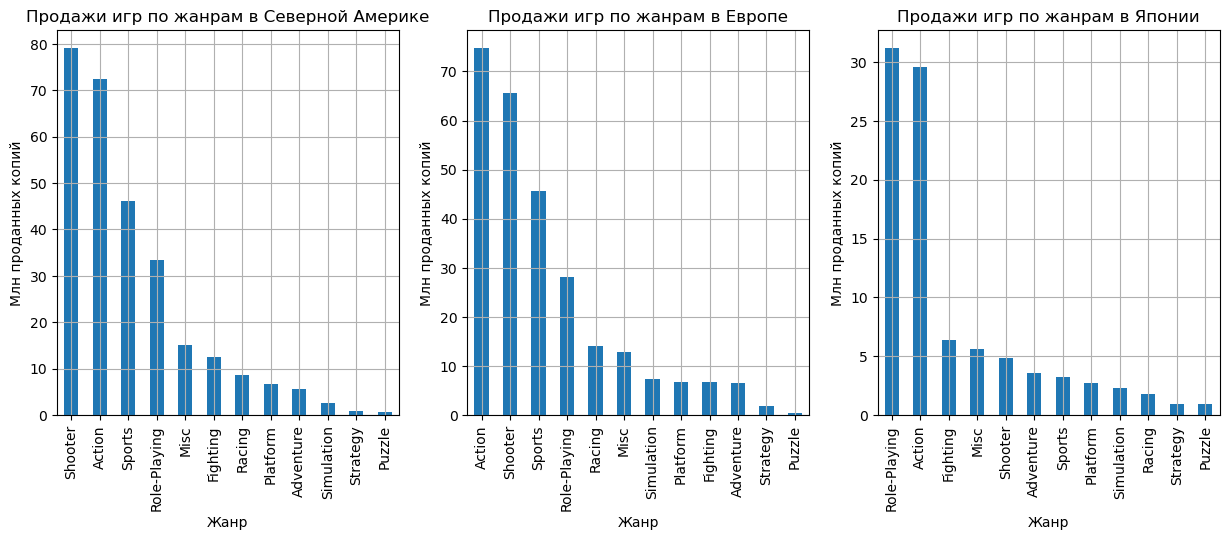

In [79]:
plt.subplot(1,3,1)
data_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                             grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='genre', values='na_sales', 
                                  aggfunc='sum').sort_values(by='na_sales', ascending=False).transpose())

plt.subplot(1,3,2)
data_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                             grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='genre', values='eu_sales', 
                                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).transpose())

plt.subplot(1,3,3)
data_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                             grid=True, figsize=(15,5))
plt.title('Продажи игр по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='genre', values='jp_sales', 
                                            aggfunc='sum').sort_values(by='jp_sales', ascending=False).transpose())


Говоря о жанровых предпочтениях, стоит отметить сходство североамериканского и европейского рынков - они оказались относительно соразмерны и рейтинг жанров по популярности в двух регионах оказался схож. В США топ-3 возглавляют игры в жанре Shooter, Action и Sports, в Европе - Action, Shooter, Sports. Наименее популярные игры - это Simulation в Северной Америке и Adventure в Европе, за которыми в обоих регионах следуют Strategy и Puzzles

В Японии ситуация обстоит иначе - японский рынок значительно меньше первых двух и на первой его строчке по популярности расположился жанр Role-Playing, это также может быть связано с традиционно распространенным в Японии поджанром JRPG. На втором месте Action, затем с отрывом почти в 6 раз Fighting. Наименее популярные жанры в Японии схожи с двумя другими регионами - Racing, Strategy, Puzzle

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Откорректировал вывод после изменения подборки

#### Влияние рейтинга ESRB на продажи в отдельном регионе

rating,M,No data,E,T,E10+
na_sales,96.42,64.72,50.74,38.95,33.23


rating,M,No data,E,T,E10+
eu_sales,93.44,58.95,58.06,34.07,26.16


rating,No data,T,E,M,E10+
jp_sales,56.9,14.78,8.94,8.01,4.46


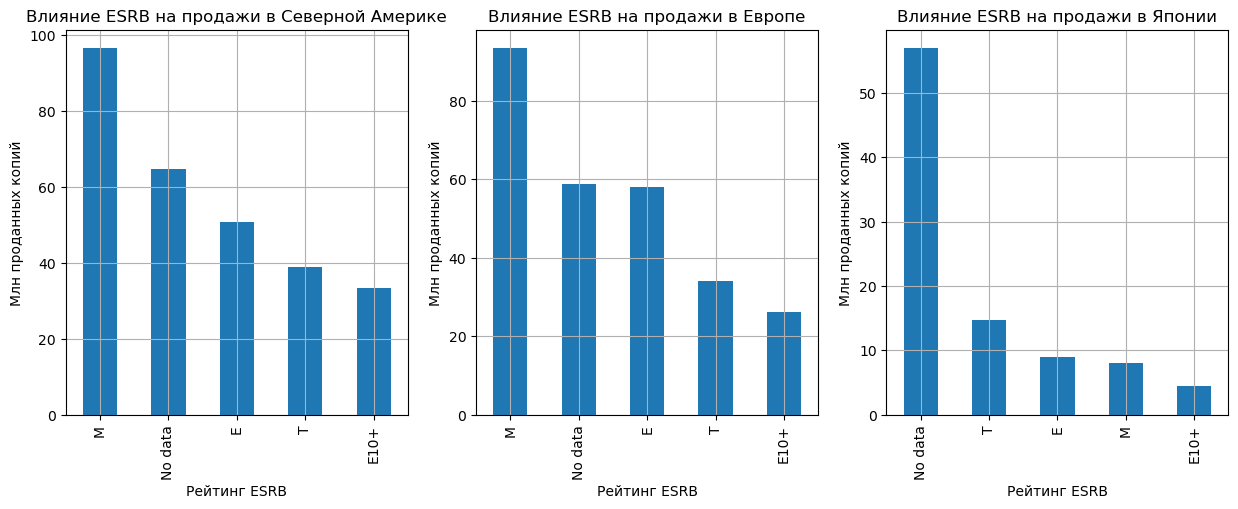

In [80]:
# Визуализируем для наглядности
plt.subplot(1,3,1)
data_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                              grid=True, figsize=(15,5))
plt.title('Влияние ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='rating', values='na_sales', 
                                            aggfunc='sum').sort_values(by='na_sales', ascending=False).transpose())

plt.subplot(1,3,2)
data_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                              grid=True, figsize=(15,5))
plt.title('Влияние ESRB на продажи в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='rating', values='eu_sales', 
                                            aggfunc='sum').sort_values(by='eu_sales', ascending=False).transpose())

plt.subplot(1,3,3)
data_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                              grid=True, figsize=(15,5))
plt.title('Влияние ESRB на продажи в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Млн проданных копий');
display(data_relevant.pivot_table(index='rating', values='jp_sales', 
                                            aggfunc='sum').sort_values(by='jp_sales', ascending=False).transpose())


Стоит дать пояснение по рейтингам. ESRB - негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
Рейтинги имеющиеся в датасете означают: 
1. M - от англ "mature" - «Для взрослых» - для пользователей старше 17 лет

2. E - от англ "everyone" - «Для всех» - для пользователей всех возрастов

3. T - от англ "teen" - "Для подростков" - для пользователей от 13 лет 

4. E10+ - от англ "Everyone 10 and older" - "Для всех от 10 лет и старше" - для пользователей от 10 лет

5. No data - было добавлено мню для заполнения пропущенных значений

В Северной Америке и Европе снова наблюдаются сходства во влиянии рейтинга ESRB на популярность игр -  первая по распространенности катергория игр в двух регионах это игры для взрослых с рейтингом "М", затем идут игры без указания рейтинга, что связано с большим количеством пропусков, причины появления которых обсуждались ранее, третья строчка за играми категории "Е" - для всех. Наменьшей популярностью пользуются игры с рейтингом E10+, то есть игры для детей.

Ситуация кардинально отличается в Японии. Там на первой строчке расположилась категория No data и в этом случае важно отметить, что это скорее всего связано с тем, что в Японии широко распространены игры для внутреннего рынка, которые официально не поставляются в другие страны, в том числе в США и Канаду, что приводит к тому, что этим играм не присваивается рейтинг ESRB. На второй строчке - игры с рейтингом T, на третьей - с рейтингом E. Вероятно, стоит также отметить, что популярные в двух других регионах игры рейтинга M не пользуются большой популярностью в Японии. Это, вероятно, обусловлено жесткой политикой видеоигровой цензуры в в стране, часто для Японии выпускаются отдельные издания с изъятиями, к примеру, особо жестоких сцен. На последнем месте, так же как и в Северной Америке и Европе - игры с рейтингом Е10+.   

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        
         Там на первой строчке расположилась категория No data и в этом случае важно отметить, что это скорее всего связано с тем, что в Японии широко распространены игры для внутреннего рынка, которые официально не поставляются в другие страны, в том числе в США и Канаду, что приводит к тому, что этим играм не присваивается рейтинг ESRB.
        
Заполнение пропусков в рейтинге позволило определить отличия региональных рынков, молодец
        
        игры рейтинга EC и RP имеют нулевые значения.
        
у нас всего пара игр во всей выборке с этими рейтингами, по этой причине в Японии у них нулевые значения        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Поправил выводы

#### Портреты пользователей по регионам

##### Портрет пользователя из североамериканского региона

Основываясь на изученных данных можно предположить, что средний пользователь из Северной Америки предпочитает в Shooter-игры с рейтингом для взрослых M на PS4 или Xbox One в качестве основной платформы

##### Портрет пользователя из европейского региона

Средний европейский игрок предпочитает Action-игры с рейтингом М, однако в качестве основной платформы отдает предпочтение PS4

##### Портрет пользователя из японского региона

Японский средний пользователь существенно отличается от европейского и американского. В качестве наиболее популярного жанра японский игрок рассматривает Role-Playing, однако игры в жанре Action не слишком от них отстают. Японские игроки также в большей степени предпочитают игры, не имеющие рейтинга ESRB, то есть, вероятно, игры японской разработки, предназначенные для внутреннего рынка. В качестве основной платформы средний японский пользователь выбирает 3DS.

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Поправил выводы в соответствии в результатами

### Проверка гипотез

#### Гипотеза о равенстве средних пользовательских рейтингов Xbox One и PC

Есть предположение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для ответа на этот вопрос необходимо провести статистический тест, в котором, нам исходя из вопроса необходимо сравнить две независимые выборки, то есть рейтинги платформ Xbox One и PC. 

Нулевая гипотеза состоит в том, что две генеральные совокупности равны, то есть разность средних значений пользовательских рейтингов на Xbox One и PC будет равна нулю.

В качестве альтернативной гипотезы выступит то, что разность средних значений пользовательских рейтингов не равна нулю, то есть что средний пользовательский рейтинг одной из платформ больше или меньше другого.

Для решения этой задачи подходит метод scipy.stats.ttest_ind с проверкой двусторонней гипотезы, поскольку перед нами не стоит задачи вычислить рейтинги какой платформы выше или ниже, в случае если нулевая гипотеза будет отвергнута.

Для проведения теста необходимо очистить данные от пропусков, количество которых достаточно велико и заполнить их нечем, однако иначе провести статистический тест не удатся.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Гипотезы сформулированы верно

In [81]:
# Создадим датафрейм с данными только по Xbox One и PC и очистим их от пропусков, чтобы впоследствии создать выборки
xbox_one = data_relevant.query('platform == "XOne"')
xbox_one = xbox_one.dropna(subset=['user_score']) 

pc = data_relevant.query('platform == "PC"')
pc = pc.dropna(subset=['user_score']) 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Важно удалить пропуски и «заглушки» перед проведением теста, молодец

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит выравнивать периоды использования платформ, одна из приставок вышла на рынок совсем недавно ...

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Я понял, что имеется в виду. Поскольку период был с 2009 года, а Xbox One вышел в 2013, это было бы не слишком корректно. По сути, после смены исследуемого периода с 2009 на 2014 год, это уже неактуально, верно?

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Все верно

In [82]:
# Проверим на наличие пропусков
display(xbox_one['user_score'].isna().sum())
display(pc['user_score'].isna().sum())

0

0

In [83]:
sample_1 = xbox_one['user_score']
sample_2 = pc['user_score']

print(f'среднее первой выборки: {np.mean(sample_1)}')
print(f'среднее второй выборки: {np.mean(sample_2)}')

alpha = 0.05

results_1 = st.stats.ttest_ind(sample_1, sample_2)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print ('Нулевую гипотезу стоит отвергуть')
else: 
    print('Нулевую гипотезу не стоит отвегать')

среднее первой выборки: 6.594545454545456
среднее второй выборки: 6.298360655737705
p-значение: 0.10450507919348415
Нулевую гипотезу не стоит отвегать


Из имеющихся данных, на основании теста с уровнем стататистической значимости в 5%, нет оснований отвергать нулевую гипотезу в пользу альтернативной

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Что означает на языке статистики p-значение: 0.32258313313994913

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> p-значение в 0.32 означает, что наблюдаемое значение близко к предполагаемому в нулевой гипотезе, то есть нулевая гипотеза не отвергается

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Что означает на языке статистики p-значение: 0.10450507919348415

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Приведу пример и теорию для понимания формулировок и интерпретации итогов проведения гипотез</b>
        
      
Задача. Приведены два датасета: сумма покупок, совершённых за месяц посетителями, привлечёнными по двум разным каналам. В вашем распоряжении случайная выборка из 30 покупок для каждого канала.
        
H0 - средние чеки равны
        
        
H1 - средние чеки НЕ равны

Да сама формулировка нулевой и альтернативной гипотезы звучит именно так, но результат теста интерпретируется другими словами
        

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
     

In [84]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Интерпретация результата:

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)


<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Стоит исправить все подобные моменты
        
        то есть средние пользовательские рейтинги действительно могут быть равны.

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
        
https://allatambov.github.io/psms/pdf/hypo-test.pdf


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Исправил, спасибо!

#### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports

Выдвинуто предположение о том, что игры в жанрах Action и Sports имеют разные средние пользовательские рейтинги. 

В целом, мы снова имеем дело с двумя независимыми друг от друга выборками - пользовательскими оценками жанров Action и Sports, так что подходящим инструментом снова будет scipy.stats.ttest_ind, который в качестве нулевой гипотезы подразумевает равенство средних двух генеральных выборок. 

То есть нулевой гипотезой как и в прошлый раз будет то, что разность средних значений выборок будет равна нулю. 

Альтернативная гипотеза состоит в том, что средний пользовательский рейтинг одного из жанров больше или меньше другого. 

Для ответа на вопрос нам снова понадобится проверка двусторонней гипотезы, так как перед нами снова не стоит задачи установить среднее какой выборки будет больше или меньше. 

Для проведения теста придется очистить данные от пропусков, которые нельзя ничем заполнить.

In [85]:
# Снова создадим соотвествующие очищенные от пропусков датафреймы для формирования выборок
action = data_relevant.query('genre == "Action"')
action = action.dropna(subset=['user_score'])

sports = data_relevant.query('genre == "Sports"')
sports = sports.dropna(subset=['user_score'])

In [86]:
# Проверим на наличие пропусков
display(action['user_score'].isna().sum())
display(sports['user_score'].isna().sum())

0

0

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Широкие строки кода рекомендуется делить на всем проекте
        
<a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

In [87]:
sample_3 = action['user_score']
sample_4 = sports['user_score']

print(f'среднее первой выборки: {np.mean(sample_3)}')
print(f'среднее второй выборки: {np.mean(sample_4)}')

alpha = 0.05

results_2 = st.stats.ttest_ind(sample_3, sample_4)

print('p-значение равно:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print ('Нулевую гипотезу стоит отвергуть')
else: 
    print('Нулевую гипотезу не стоит отвегать')

среднее первой выборки: 6.760606060606061
среднее второй выборки: 5.2251968503937
p-значение равно: 2.8711147985105864e-19
Нулевую гипотезу стоит отвергуть


На основании проведенного статистического теста, есть основания отвергуть нулевую гипотезу в пользу альтернативной

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит исключить предупреждения. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения. 
        
А оптимальнее поправить код
        
        /tmp/ipykernel_325/1744792496.py:9: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
          results_2 = st.stats.ttest_ind(sample_3, sample_4)        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Сделал через warnings.filterwarnings('ignore')
        
        


### Итоговый вывод

#### Предобработка данных

В рамках первого этапа работы над проектом были импортированы необходимые для работы библиотеки, были загружены и изучены данные. Названия столбцов датасета были приведены к единому регистру. 

Затем были изучены типы имеющихся данных, некоторые из которых были изменены для удобства и корректности работы. Так, некоторые данные были переведены в целочисленные и числовые значения из вещественных и объектов.

На следующем этапе были выявлены и удалены дубликаты по имени, платформе и году релиза игры. Затем был проведен поиск пропущенных значений, выдвинуты предположения об их возникновении и устранены незначительные пропуски. 

Предполагаемые причины возникновения пропущенных значений:

1)  Единственный пропуск в столбце "name", вероятно, связан с технической ошибкой, поскольку помимо названия, в той же строке отсутствовали и другие данные, в том числе и в столбце "genre", где также был только один пропуск;

2) Пропуски в "year_of_release" могли быть связаны с различными причинами, как техническими, так и связанными с ошибками при заполнении. В пользу этого говорит то, что в некоторых названиях игр в той или иной указан год - для примера "Madden NFL 2004", "wwe Smackdown vs. Raw 2006", "Tiger Woods PGA Tour 07", 'College Hoops 2K6'. Также встречаются игры с указанием года выпуска в скобках 'Tomb Raider (2013)'. Количество пропусков оказалось не слишком велико по сравнению с общим размером датасета, поэтому было принято решение их удалить;

3) Пропуски в столбце "critic_score" могут быть связаны с тем, что игры не вышли на американском или европейском рынке. Это прежположение было сделано, исходя из распространенной в Японии практики выпуска игр только для внутреннего рынка. Такие игры могут быть малоизвестны и не получить оценки критиков за пределами страны. Также cуществует вероятность того, что игры могли выходить слишком давно для того, чтобы о них писали критические отзывы на площадках, откуда собирались данные для датасета. Возможны и ошибки технического характера, например, ошибки при выгрузке;

4) Причины для пропусков в "user_score" так же могут быть связаны с регионами продаж, популярностью игр, годом выпуска или техническими ошибками;

5) Часть пропусков в столбце 'rating' могла возникнуть по причине того, что некоторые из игр вышли до создания Ассоциации ESRB, и рейтинг им, возможно, не присваивался. Также пропуски в ней могут быть связаны с тем, что ESRB выдает рейтинги для развлекательного ПО на территории США и Канады, следовательно, если игры не были представлены на североамериканском рынке, то рейтинг тоже может отсутствовать. Не исключаютсяь также и ошибки технического характера;

На следующем шаге в датасет был добавлен столбец с совокупными продажами игр по всем регионам.


#### Проведение исследования

Затем был проведен исследовательский анализ, первым этапом в рамках которого стало изучение количества выпускаемых игр по годам. Был сделан вывод, что количество выпускаемых игр до 1994 года оказалось слишком мало и было принято решение исключить их из датасета, потери при этом также оказались допустимы. 

После этого были проанализированы платформы и динамика их продаж. Были выделены наиболее популярные плфтормы, в список которых попали  PS2, X360, PS3, Wii, DS и PS. Для них было построено распределение по годам. Далее был рассчитан период актуальности платформы - он составил 7 лет, что, в целом, попадает в интервал между поколениями консолей, которые выходят раз в 6-8 лет. Затем был определен актуальный период для проведения дальнейшего исследования - с 2014 года, включительно. Была изучена динамика продаж по платформам в рамках ислледуемого периода. На конец 2016 года самыми потенциально прибыльными платформами оказались PS4, XOne и 3DS. 

Следующим шагом стало построение диаграммы размаха продаж игр по платформам, было установлено, что в среднем нормальные значения количества проданных копий находятся в промежутке до 0.83 млн, медиана составляет 100 тыс. проданных копий.

Затем диаграммы размаха были построены для каждой из исследуемых платформ. Были сделаны следующие выводы: 

1) Наибольшее количество игр за исследуемый период было продано на PC PS4(376), PSV(295), XOne(228)

2) Наибольшие продажи по количеству копий приходятся на PS4 - нормальное значения проданных копий игры там в районе 1.64 млн, затем идет XOne с 1,5 млн и WiiU - 1,35 млн копий. 

3) Максимальное количество проданных копий одной игры принадлежит PS4 - 14.63 млн копий, на втором месте 3DS - 11.68 млн копий и PC - 7.39 млн копий

4) Медианные значения также отличаются у всех платформ, однако у трех платформ-лидеров по продажам они находятся в районе 0.2 млн копий.


После этого было изучено влияние профессиональных и пользовательских оценок на продажи игр для ряда платформ, были построены диаграммы рассеняния. По итогу не было выявлено их значительного влияния отзывов критиков и пользователей на размеры продаж. Однако стоит отметить, что пользовательские отзывы играли немного большую роль в случае с консолями Nintendo WiiU и 3DS, что может быть обусловлено особенностями японского рынка, на котором они широко представлены.

В рамках анализа также были изучены продажи игр по жанрам в мире и в отдельных регионах. В качестве самых продаваемых жанров были определены "Action", "Shooter" и "Sports", к наименее популярным относятся "Simulation", "Strategy" и "Puzzle".

Жанровые предпочтения на североамериканском и европейском рынках оказались схожи - в США топ-3 возглавляют игры в жанре Shooter, Action и Sports, в Европе - Action, Shooter, Sports. Наименее популярные игры - это Simulation в Северной Америке и Adventure в Европе, за которыми в обоих регионах следуют Strategy и Puzzles

В Японии ситуация обстоит иначе - японский рынок значительно меньше первых двух и на первой его строчке по популярности расположился жанр Role-Playing, это также может быть связано с традиционно распространенным в Японии поджанром JRPG. На втором месте Action, затем с отрывом почти в 6 раз Fighting. Наименее популярные жанры в Японии схожи с двумя другими регионами - Racing, Strategy, Puzzle 

Для исследования жанровых предпочтений были также построены диаграммы размаха, что позволило сделать следующие выводы: 

Наиболее прибыльным жанром, судя по диаграмме представляется Shooter - верхняя граница нормальных значений в этом жанре находится в районе 3.8 млн проданных копий, за ним следует Sports - с границей в районе 1.5 млн копий, третья строчка за Platform c 1 млн проданных копий - медианные продажи этих жанров также закономерно выше других.

Жанр Action, который занимает первенство по совокупным продажам здесь находится только на пятой строчке. Вероятно, суммарное количество проданных копий в этом жанре, обусловлено большим количеством выбросоа, что также видно на диаграмме размаха.

Предпочтения по платформам по регионам отличаются друг от друга, так в Северной Америке наибольшей популярностью пользуются PS4, XOne - разница между ними не сликом драматичная и на их долю приходится порядка 64% от рынка. На третьем месте идет категория "Другие", в которую вошли платформы не вошедшие в топ-5, следовательно третья строчка в топе принадлежит X360. Популярность как XOne, так и X360 на фоне остальных регионов можно обусловить тем консоли от Microsoft традиционно популярны в США и менее распространены в других странах. На 3DS и PS3 приходится примерно по 8%. Итого, консоли производства Sony занимают на североамериканском рынке около 43%, а платформы от Microsoft около 39%.

В Европе самая популярная платформа - PS4 - 48% пользователей играют на ней, на второй строчке XOne с 17% и замыкает тройку лидеров, исключая 'Others' PS3 c 9%. Так, консоли Sony в совокупности занимают на европейском рынке около 57%. 

В Японии традиционно популярны портативные платформы, этим обсуловлено подавляющее превосходство 3DS - порядка 48% приходится на эту консоль от Nintendo. На втором месте находятся платформы PS4 и PSV - по 16% от объема рынка, а замыкает тройку лидеров PS3 c 12% от рынка. На WiiU приходится 8%. Так, на портативные консоли на японском рынке приходится 72% рынка, на домашние полноформатные платформы 28%, консоли от Nintendo занимают 56% рынка, около 44% занимают приставки Sony. На иные платформы отводится меньше 1%.


Было также изучено влияние рейтинга ESRB на продажи в отдельных регионах. ESRB - негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Рейтинги имеющиеся в датасете означают: 
1. M - от англ "mature" - «Для взрослых» - для пользователей старше 17 лет

2. E - от англ "everyone" - «Для всех» - для пользователей всех возрастов

3. T - от англ "teen" - "Для подростков" - для пользователей от 13 лет 

4. E10+ - от англ "Everyone 10 and older" - "Для всех от 10 лет и старше" - для пользователей от 10 лет

5. EC - от англ. "Early childhood" - "Для детей младшего возраста" - для пользователей от 3 лет 

6. RP - от англ. "Rating Pending" -  «Рейтинг ожидается» - продукт ожидает присвоения рейтинга 

7. No data - было добавлено для заполнения пропущенных значений

В Северной Америке и Европе снова наблюдаются сходства во влиянии рейтинга ESRB на популярность игр -  первая по распространенности катергория игр в двух регионах это игры для взрослых с рейтингом "М", затем идут игры без указания рейтинга, что связано с большим количеством пропусков, причины появления которых обсуждались ранее, третья строчка за играми категории "Е" - для всех. Наменьшей популярностью пользуются игры с рейтингом E10+, то есть игры для детей.

Ситуация кардинально отличается в Японии. Там на первой строчке расположилась категория No data и в этом случае важно отметить, что это скорее всего связано с тем, что в Японии широко распространены игры для внутреннего рынка, которые официально не поставляются в другие страны, в том числе в США и Канаду, что приводит к тому, что этим играм не присваивается рейтинг ESRB. На второй строчке - игры с рейтингом T, на третьей - с рейтингом E. Вероятно, стоит также отметить, что популярные в двух других регионах игры рейтинга M не пользуются большой популярностью в Японии. Это, вероятно, обусловлено жесткой политикой видеоигровой цензуры в в стране, часто для Японии выпускаются отдельные издания с изъятиями, к примеру, особо жестоких сцен. На последнем месте, так же как и в Северной Америке и Европе - игры с рейтингом Е10+. 

#### Потреты пользователей из разных регионов

На основании изученных данных были составлены потреты средних пользователей из трех регионов. 

Основываясь на изученных данных можно предположить, что средний пользователь из Северной Америки предпочитает в Shooter-игры с рейтингом для взрослых M на PS4 или Xbox One в качестве основной платформы 

Средний европейский игрок предпочитает Action-игры с рейтингом М, однако в качестве основной платформы отдает предпочтение PS4

Японский средний пользователь существенно отличается от европейского и американского. В качестве наиболее популярного жанра японский игрок рассматривает Role-Playing, однако игры в жанре Action не слишком от них отстают. Японские игроки также в большей степени предпочитают игры, не имеющие рейтинга ESRB, то есть, вероятно, игры японской разработки, предназначенные для внутреннего рынка. В качестве основной платформы средний японский пользователь выбирает 3DS.

#### Проверка гипотез

На заключительном этапе проекта были проверены две гипотезы. Первое предположение - гипотеза о равенстве средних пользовательских рейтингов Xbox One и PC. Были сформированы соответствующие независимые выборки и проведено статистическое исследование, по результатам не было оснований отвергнуть гипотезу в пользу альтернативной, состоящей в том, что разность средних значений пользовательских рейтингов не равна нулю, то есть что средний пользовательский рейтинг одной из платформ больше или меньше другого.

Второе предположение - гипотеза о различии средних пользовательских рейтингов жанров Action и Sports. Был проведен аналогичный статистический тест, однако с другой формулировкой нулевой и альтернативной гипотез. Нулевая гипотеза предполагала, что разность средних значений выборок будет равна нулю. Альтернативная - что средний пользовательский рейтинг одного из жанров больше или меньше другого. По итогам теста были основания отвергнуть нулевую гипотезу в пользу альтернативной.

#### Рекомендации

По итогам проведенного исследования стоит сделать предположение, что для получения большей выгоды компании стоит сосредоточиться на продаже игр в североамериканский и европейский регионы, поскольку они в отличие от Японии, которая отличается от них по всем параметрам, включая размер рынка, представляют собой крупные рынки, схожие в своих жанровых предпочтениях (Action, Shooter и Sports), что упрощает удовлетворение спроса целевой аудитории. В качестве основной платформы стоит остановиться на PS4, поскольку она оказалась наиболее востребованной в странах двух регионов.



<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит перепроверить результаты после определения актуального периода и исправления всех комментариев, можно обновить названия самых актуальных платформ, жанров и рейтингов, какую долю они занимают на исследуемых рынках
         
     
        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Внес в текст вывода правки в соответствии с изменением выборки и промежуточных выводов

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод получился объемным. М.б. стоит добавить оформление итоговому выводу — разделить его на подразделы → подзаголовками
        
+ предобработка данных
+ исследование
+ портреты
+ рекомендации   

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Спасибо, отработал

<div class="alert alert-success">
<font size="5", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Ты выполнил практически все пункты проекта, молодец! Проведен значительный объем исследования 
        
Критические ❌ комментарии связаны с неточностями: 

 + добавить название
 + самое важное — переопределить актуальный период
 + исправить диаграмму размаха для анализа продаж на актуальных платформах
 + оценить прибыльность жанров на диаграмме размаха
 + перестроить графики в ТОП-5
 + в разделе проверки гипотез подправить выборки плюс можно более подробно расшифровать значение p_value 
 + перепроверить промежуточные и итоговый выводы после всех исправлений

Стоит обратить внимание на ⚠️ комментарии...        
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5", color= "seagreen"><b>Жду твой проект и твои комментарии 🤝</b></font><br />

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)   
    
Плюс    
    
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
<br />
<font size="3", color = "black">
<br /> Спасибо! Надеюсь, успею сдаться к жесткому дедлайну. С наступающим праздником, Ринат! (Если ты празднуешь, конечно)

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

### Бонус

In [88]:
data_games = pd.read_csv('/datasets/games.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

In [ ]:
data_games.columns = map(str.lower, data_games.columns)

In [ ]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [ ]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [ ]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [ ]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [ ]:
# check
# круги + категория другие

# функция не работает на версии библиотеки pandas = 2.0 (метод .append устарел)

def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
# Цветовая гамма не подбиралась специально под платформы, кому-что попадется, 😉      
      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

In [ ]:
# check
# круги в ряд

x_year = 2009

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

In [ ]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ

In [ ]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])